<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [4]:
#RT function
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [11]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N


In [12]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('probability')
    plt.ylabel('accuracy')
    return plt.show()

In [13]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fb435340cb0>


In [50]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon_array
    print('whole dataframe', '\n' , df)
    df['time'] = pd.to_numeric(df['time'])
    #df1 = df.loc[lambda df: df['right'] == 1]
    #accuracy = df1.shape[0]/N
    #print('acc by cut', accuracy)
    mean_by_right = df[['right', 'time']].groupby('right').agg(['count', 'mean'])

    #print(list(mean_by_right.columns))    
    accuracy_of_right_decisions = mean_by_right[('time', 'count')][1]/N
    print('aggregated:', accuracy_of_right_decisions)
    accuracy_of_false_decisions = mean_by_right[('time', 'count')][0]/N
    print(accuracy_of_false_decisions)
    average_of_right_decisions = mean_by_right[('time', 'mean')][1]
    average_of_false_decisions = mean_by_right[('time', 'mean')][0]
    print('average of right desicions is', average_of_right_decisions, 'and average of false is', average_of_false_decisions)
    #print('new dataframe', '\n', df1)
    print("mean by right and wrong", '\n', mean_by_right)
    #print(df1.describe())
    #average_rtime = df1['time'].mean()

    return accuracy_of_right_decisions, average_of_right_decisions, average_of_false_decisions

    


print('av time is',df_average(n=12, p_global = 18))

whole dataframe 
    intention  answer time  right  con
0     global   local   85      0  0.0
1     global   local  139      0  0.0
2     global   local   81      0  0.0
3     global   local   94      0  0.0
4     global   local   45      0  0.0
..       ...     ...  ...    ...  ...
95    global  global  134      1  0.0
96    global   local  139      0  0.0
97    global   local   45      0  0.0
98    global   local   23      0  0.0
99    global   local   32      0  0.0

[100 rows x 5 columns]
aggregated: 0.03
0.97
average of right desicions is 82.0 and average of false is 107.34020618556701
mean by right and wrong 
        time            
      count        mean
right                  
0        97  107.340206
1         3   82.000000
av time is (0.03, 82.0, 107.34020618556701)


whole dataframe 
    intention answer time  right  con
0      local  local   18      1  0.0
1      local  local   16      1  0.0
2      local  local   25      1  0.0
3      local  local   14      1  0.0
4      local  local   36      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   27      1  0.0
96     local  local   29      1  0.0
97     local  local   18      1  0.0
98     local  local   18      1  0.0
99     local  local   14      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention answer  time  right  con
0      local  local    18      1  0.0
1      local  local    16      1  0.0
2      local  local    25      1  0.0
3      local  local    14      1  0.0
4      local  local    36      1  0.0
..       ...    ...   ...    ...  ...
95     local  local    27      1  0.0
96     local  local    29      1  0.0
97     local  local    18      1  0.0
98     local  local    18      1  0.0
99     local  local    14      1  0.0

[100 rows x 5 columns]
             t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0      local  local  112      1  0.0
1      local  local   83      1  0.0
2      local  local   99      1  0.0
3      local  local   42      1  0.0
4      local  local   30      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   50      1  0.0
96     local  local   71      1  0.0
97     local  local   42      1  0.0
98     local  local   50      1  0.0
99     local  local   91      1  0.0

[100 rows x 5 columns]
0.98
new dataframe 
    intention answer  time  right  con
0      local  local   112      1  0.0
1      local  local    83      1  0.0
2      local  local    99      1  0.0
3      local  local    42      1  0.0
4      local  local    30      1  0.0
..       ...    ...   ...    ...  ...
95     local  local    50      1  0.0
96     local  local    71      1  0.0
97     local  local    42      1  0.0
98     local  local    50      1  0.0
99     local  local    91      1  0.0

[98 rows x 5 columns]
             t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   92.000000   92.0  92.0
mean    94.021739    1.0   0.0
std     62.473023    0.0   0.0
min     23.000000    1.0   0.0
25%     48.750000    1.0   0.0
50%     70.000000    1.0   0.0
75%    130.000000    1.0   0.0
max    352.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0      local  global  100      0  0.0
1      local   local  117      1  0.0
2      local   local   88      1  0.0
3      local   local  266      1  0.0
4      local   local  122      1  0.0
..       ...     ...  ...    ...  ...
95     local   local   88      1  0.0
96     local   local  112      1  0.0
97     local   local   73      1  0.0
98     local   local   88      1  0.0
99     local   local  127      1  0.0

[100 rows x 5 columns]
0.86
new dataframe 
    intention answer  time  right  con
1      local  local   117      1  0.0
2      local  local    88      1  0.0
3      local  local   266      1  0.0
4      local  local   122      1  0.0
5      local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   86.000000   86.0  86.0
mean   125.023256    1.0   0.0
std     73.592355    0.0   0.0
min     35.000000    1.0   0.0
25%     69.000000    1.0   0.0
50%    112.000000    1.0   0.0
75%    168.750000    1.0   0.0
max    397.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0      local  global  272      0  0.0
1      local   local   90      1  0.0
2      local   local  111      1  0.0
3      local  global   88      0  0.0
4      local   local   64      1  0.0
..       ...     ...  ...    ...  ...
95     local   local  101      1  0.0
96     local   local  248      1  0.0
97     local   local  132      1  0.0
98     local   local  111      1  0.0
99     local   local   64      1  0.0

[100 rows x 5 columns]
0.7
new dataframe 
    intention answer  time  right  con
1      local  local    90      1  0.0
2      local  local   111      1  0.0
4      local  local    64      1  0.0
5      local  local    48      1  0.0
6      local 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


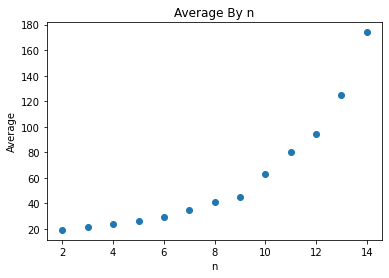

In [31]:
def plot_average_by_n(N=100, min=2, max=15, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    print(ar_av)
    average_for_plot = ar_av[:,1]
    print("average for plot:", '\n', average_for_plot)
    plt.scatter(n_range, average_for_plot)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    return plt.show() 

print(plot_average_by_n(p_global=18, intention = 'local'))    

whole dataframe 
    intention  answer time  right  con
0      local  global  107      0  0.0
1      local  global  115      0  0.0
2      local  global   72      0  0.0
3      local  global  184      0  0.0
4      local  global  107      0  0.0
..       ...     ...  ...    ...  ...
95     local  global  146      0  0.0
96     local  global  102      0  0.0
97     local  global  101      0  0.0
98     local  global   84      0  0.0
99     local  global  109      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0      local  global   77      0  0.0
1      local  global   66      0  0.0
2      local  global  126      0  0.0
3      local  global  1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0      local  global   235      0  0.0
1      local   local  1125      1  0.0
2      local  global  1656      0  0.0
3      local  global   803      0  0.0
4      local   local  1318      1  0.0
..       ...     ...   ...    ...  ...
95     local  global   227      0  0.0
96     local  global   200      0  0.0
97     local  global  2220      0  0.0
98     local  global  2002      0  0.0
99     local  global   576      0  0.0

[100 rows x 5 columns]
0.4
new dataframe 
    intention answer  time  right  con
1      local  local  1125      1  0.0
4      local  local  1318      1  0.0
5      local  local   197      1  0.0
6      local  local   983      1  0.0
7      local  local   197      1  0.0
13     local  local   197      1  0.0
14     local  local   377      1  0.0
16     local  local   893      1  0.0
20     local  local  1550      1  0.0
23     local  local   583      1  0.0
26     local  local   983      1  0.0
28     local  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0      local   local   746      1  0.0
1      local   local   505      1  0.0
2      local   local   166      1  0.0
3      local   local  1227      1  0.0
4      local   local   735      1  0.0
..       ...     ...   ...    ...  ...
95     local   local   986      1  0.0
96     local   local   406      1  0.0
97     local  global   392      0  0.0
98     local   local   275      1  0.0
99     local  global   233      0  0.0

[100 rows x 5 columns]
0.88
new dataframe 
    intention answer  time  right  con
0      local  local   746      1  0.0
1      local  local   505      1  0.0
2      local  local   166      1  0.0
3      local  local  1227      1  0.0
4      local  local   735      1  0.0
..       ...    ...   ...    ...  ...
93     local  local   220      1  0.0
94     local  local   505      1  0.0
95     local  local   986      1  0.0
96     local  local   406      1  0.0
98     local  local   275      1  0.0

[88 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


              time  right    con
count   100.000000  100.0  100.0
mean    266.350000    1.0    0.0
std     172.351144    0.0    0.0
min      66.000000    1.0    0.0
25%     150.000000    1.0    0.0
50%     197.000000    1.0    0.0
75%     345.000000    1.0    0.0
max    1088.000000    1.0    0.0
whole dataframe 
    intention answer time  right  con
0      local  local   72      1  0.0
1      local  local  121      1  0.0
2      local  local   97      1  0.0
3      local  local  113      1  0.0
4      local  local  429      1  0.0
..       ...    ...  ...    ...  ...
95     local  local  194      1  0.0
96     local  local  170      1  0.0
97     local  local   80      1  0.0
98     local  local   80      1  0.0
99     local  local  153      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention answer  time  right  con
0      local  local    72      1  0.0
1      local  local   121      1  0.0
2      local  local    97      1  0.0
3      local  local   113      1  0.0
4      

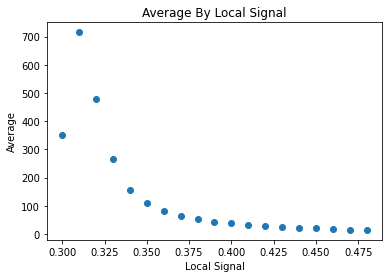

None


In [32]:
#plot average by local signal

def plot_average_by_local_signal(N=100, min=0.2, max=0.49, step = 0.01, n=12, global_s=0.55, p_global =50, intention = 'global'):
    local_sig_range = np.arange(min,max,step)
    #print(local_sig_range)
    av_by_local_signal = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=y, n=n, intention=intention)
    ar_av_local = np.array([av_by_local_signal(yi) for yi in local_sig_range])
    ar_av_local_for_plot = ar_av_local[:,1]
    plt.scatter(local_sig_range, ar_av_local_for_plot)
    plt.title('Average By Local Signal')
    plt.xlabel('Local Signal')
    plt.ylabel('Average')
    return plt.show()

print(plot_average_by_local_signal(intention = 'local', p_global = 8, n=6)) 

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69]
135
[0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46
 0.48]
whole dataframe 
    intention  answer time  right  con
0     global  global  378      1  0.0
1     global  global  271      1  0.0
2     global  global  467      1  0.0
3     global  global  173      1  0.0
4     global  global  220      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  356      1  0.0
96    global  global  331      1  0.0
97    global  global  313      1  0.0
98    global  global  209      1  0.0
99    global  global  341      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global   378      1  0.0
1     global  global   271      1  0.0
2     global  global   467      1  0.0
3     global  global   173      1  0.0
4     global  global   220      1  0.0
..       ...     ...   ...    ...  ...
95    glo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  238      0  0.0
1     global  local  160      0  0.0
2     global  local  219      0  0.0
3     global  local  238      0  0.0
4     global  local  258      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  199      0  0.0
96    global  local  278      0  0.0
97    global  local  140      0  0.0
98    global  local  179      0  0.0
99    global  local  317      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local  147      0  0.0
1     global  local  101      0  0.0
2     global  local  124      0  0.0
3     global  local   90      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  162      0  0.0
1     global  local  606      0  0.0
2     global  local  162      0  0.0
3     global  local  140      0  0.0
4     global  local  207      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  362      0  0.0
96    global  local  207      0  0.0
97    global  local  229      0  0.0
98    global  local  251      0  0.0
99    global  local  495      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   91      0  0.0
1     global  local  129      0  0.0
2     global  local  117      0  0.0
3     global  local   91      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  285      0  0.0
1     global  local  333      0  0.0
2     global  local  213      0  0.0
3     global  local  550      0  0.0
4     global  local  285      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  406      0  0.0
96    global  local  478      0  0.0
97    global  local  188      0  0.0
98    global  local  188      0  0.0
99    global  local  237      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local  134      0  0.0
1     global  local  106      0  0.0
2     global  local  106      0  0.0
3     global  local  134      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  472      0  0.0
1     global  local  319      0  0.0
2     global  local  447      0  0.0
3     global  local  268      0  0.0
4     global  local  191      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  191      0  0.0
96    global  local  191      0  0.0
97    global  local  191      0  0.0
98    global  local  242      0  0.0
99    global  local  242      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   78      0  0.0
1     global  local  152      0  0.0
2     global  local   78      0  0.0
3     global  local   78      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  778      0  0.0
1     global  local  140      0  0.0
2     global  local  140      0  0.0
3     global  local  433      0  0.0
4     global  local  167      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  140      0  0.0
96    global  local  300      0  0.0
97    global  local  273      0  0.0
98    global  local  220      0  0.0
99    global  local  326      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
64    global  global   528      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   528.0    1.0  0.0
std      NaN    NaN  NaN
min    528.0    1.0  0.0
25%    528.0    1.0  0.0
50%    528.0    1.0  0.0
75%    528.0    1.0  0.0
max    528.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local  154      0  0.0
1     global  local  109      0  0.0
2     global  local  124      0  0.0
3     global  local  109

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   46      0  0.0
2     global  local   55      0  0.0
3     global  local   46      0  0.0
4     global  local   55      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   55      0  0.0
96    global  local   55      0  0.0
97    global  local   55      0  0.0
98    global  local   46      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   35      0  0.0
2     global  local   41      0  0.0
3     global  local   29      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  522      0  0.0
1     global  local  167      0  0.0
2     global  local  331      0  0.0
3     global  local  222      0  0.0
4     global  local  222      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  495      0  0.0
96    global  local  249      0  0.0
97    global  local  140      0  0.0
98    global  local  249      0  0.0
99    global  local  140      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   78      0  0.0
1     global  local   78      0  0.0
2     global  local  110      0  0.0
3     global  local   78      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  251      0  0.0
1     global  local  307      0  0.0
2     global  local  279      0  0.0
3     global  local  251      0  0.0
4     global  local  335      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  807      0  0.0
96    global  local  307      0  0.0
97    global  local  362      0  0.0
98    global  local  307      0  0.0
99    global  local  390      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
59    global  global   153      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   153.0    1.0  0.0
std      NaN    NaN  NaN
min    153.0    1.0  0.0
25%    153.0    1.0  0.0
50%    153.0    1.0  0.0
75%    153.0    1.0  0.0
max    153.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local  126      0  0.0
1     global  local   94      0  0.0
2     global  local   94      0  0.0
3     global  local   78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   56      0  0.0
1     global  local   46      0  0.0
2     global  local   75      0  0.0
3     global  local   56      0  0.0
4     global  local   56      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   56      0  0.0
96    global  local   46      0  0.0
97    global  local   95      0  0.0
98    global  local   65      0  0.0
99    global  local   56      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   29      0  0.0
1     global  local   29      0  0.0
2     global  local   35      0  0.0
3     global  local   41      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  787      0  0.0
1     global  local  253      0  0.0
2     global  local  168      0  0.0
3     global  local  196      0  0.0
4     global  local  253      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  225      0  0.0
96    global  local  168      0  0.0
97    global  local  225      0  0.0
98    global  local  421      0  0.0
99    global  local  281      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local  127      0  0.0
1     global  local  207      0  0.0
2     global  local  110      0  0.0
3     global  local  175      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  140      0  0.0
1     global  local  254      0  0.0
2     global  local  197      0  0.0
3     global  local  254      0  0.0
4     global  local  197      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  339      0  0.0
96    global  local  537      0  0.0
97    global  local  169      0  0.0
98    global  local  339      0  0.0
99    global  local  197      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   78      0  0.0
1     global  local   78      0  0.0
2     global  local  127      0  0.0
3     global  local   78      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  238      0  0.0
1     global  local  474      0  0.0
2     global  local  396      0  0.0
3     global  local  297      0  0.0
4     global  local  278      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  376      0  0.0
96    global  local  199      0  0.0
97    global  local  219      0  0.0
98    global  local  317      0  0.0
99    global  local  238      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local  181      0  0.0
1     global  local   90      0  0.0
2     global  local  124      0  0.0
3     global  local  124      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  451      0  0.0
1     global  local  162      0  0.0
2     global  local  584      0  0.0
3     global  local  207      0  0.0
4     global  local  295      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  429      0  0.0
96    global  local  162      0  0.0
97    global  local  384      0  0.0
98    global  local  273      0  0.0
99    global  local  606      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
70    global  global   153      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   153.0    1.0  0.0
std      NaN    NaN  NaN
min    153.0    1.0  0.0
25%    153.0    1.0  0.0
50%    153.0    1.0  0.0
75%    153.0    1.0  0.0
max    153.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   78      0  0.0
1     global  local  117      0  0.0
2     global  local  104      0  0.0
3     global  local  129

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   54      0  0.0
1     global  local   54      0  0.0
2     global  local   46      0  0.0
3     global  local   46      0  0.0
4     global  local   46      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   46      0  0.0
96    global  local   46      0  0.0
97    global  local   70      0  0.0
98    global  local   62      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   29      0  0.0
1     global  local   34      0  0.0
2     global  local   34      0  0.0
3     global  local   39      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  671      0  0.0
1     global  local  430      0  0.0
2     global  local  188      0  0.0
3     global  local  574      0  0.0
4     global  local  526      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  237      0  0.0
96    global  local  237      0  0.0
97    global  local  188      0  0.0
98    global  local  695      0  0.0
99    global  local  550      0  0.0

[100 rows x 5 columns]
0.04
new dataframe 
    intention  answer  time  right  con
39    global  global    92      1  0.0
44    global  global   119      1  0.0
70    global  global   149      1  0.0
86    global  global   509      1  0.0
             time  right  con
count    4.000000    4.0  4.0
mean   217.250000    1.0  0.0
std    195.888361    0.0  0.0
min     92.000000    1.0  0.0
25%    112.250000    1.0  0.0
50%    134.000000    1.0  0.0
75%    239.000000    1.0  0.0
max    509.000000    1.0  0.0
whole dataframe 
    intenti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   63      0  0.0
1     global  local   46      0  0.0
2     global  local   63      0  0.0
3     global  local   46      0  0.0
4     global  local   63      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   55      0  0.0
96    global  local   63      0  0.0
97    global  local   46      0  0.0
98    global  local   80      0  0.0
99    global  local   80      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   34      0  0.0
1     global  local   34      0  0.0
2     global  local   57      0  0.0
3     global  local   34      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   55      0  0.0
1     global  local   91      0  0.0
2     global  local   91      0  0.0
3     global  local   64      0  0.0
4     global  local   46      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   55      0  0.0
96    global  local   46      0  0.0
97    global  local   73      0  0.0
98    global  local   64      0  0.0
99    global  local   55      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   47      0  0.0
2     global  local   35      0  0.0
3     global  local   35      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   74      0  0.0
1     global  local   46      0  0.0
2     global  local   74      0  0.0
3     global  local  139      0  0.0
4     global  local   93      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   46      0  0.0
96    global  local   46      0  0.0
97    global  local   46      0  0.0
98    global  local   55      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0     global   local   440      0  0.0
1     global   local   358      0  0.0
2     global   local   277      0  0.0
3     global   local   140      0  0.0
4     global  global   128      1  0.0
..       ...     ...   ...    ...  ...
95    global   local   495      0  0.0
96    global   local   277      0  0.0
97    global   local   413      0  0.0
98    global   local  2214      0  0.0
99    global   local   631      0  0.0

[100 rows x 5 columns]
0.15
new dataframe 
    intention  answer  time  right  con
4     global  global   128      1  0.0
12    global  global   100      1  0.0
16    global  global   788      1  0.0
19    global  global   511      1  0.0
20    global  global   494      1  0.0
28    global  global   397      1  0.0
33    global  global   727      1  0.0
40    global  global   574      1  0.0
41    global  global   160      1  0.0
42    global  global   210      1  0.0
45    global  global   227      1  0.0
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   94      0  0.0
1     global  local   65      0  0.0
2     global  local   65      0  0.0
3     global  local   84      0  0.0
4     global  local   84      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   46      0  0.0
96    global  local   56      0  0.0
97    global  local   75      0  0.0
98    global  local   56      0  0.0
99    global  local   65      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   41      0  0.0
2     global  local   29      0  0.0
3     global  local   35      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0     global   local   279      0  0.0
1     global  global  1178      1  0.0
2     global   local  2279      0  0.0
3     global   local   362      0  0.0
4     global   local   474      0  0.0
..       ...     ...   ...    ...  ...
95    global   local   196      0  0.0
96    global   local   251      0  0.0
97    global   local   335      0  0.0
98    global   local   946      0  0.0
99    global   local   362      0  0.0

[100 rows x 5 columns]
0.07
new dataframe 
    intention  answer  time  right  con
1     global  global  1178      1  0.0
28    global  global   109      1  0.0
29    global  global   990      1  0.0
43    global  global   148      1  0.0
57    global  global   188      1  0.0
60    global  global  1490      1  0.0
71    global  global   387      1  0.0
              time  right  con
count     7.000000    7.0  7.0
mean    641.428571    1.0  0.0
std     566.681526    0.0  0.0
min     109.000000    1.0  0.0
25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   85      0  0.0
2     global  local   65      0  0.0
3     global  local   46      0  0.0
4     global  local   85      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   56      0  0.0
96    global  local   46      0  0.0
97    global  local   75      0  0.0
98    global  local   95      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   56      0  0.0
1     global  local   46      0  0.0
2     global  local   85      0  0.0
3     global  local   85      0  0.0
4     global  local   46      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   56      0  0.0
96    global  local   66      0  0.0
97    global  local   46      0  0.0
98    global  local   66      0  0.0
99    global  local   66      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   29      0  0.0
1     global  local   29      0  0.0
2     global  local   35      0  0.0
3     global  local   48      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0     global   local   509      0  0.0
1     global   local  1331      0  0.0
2     global  global   341      1  0.0
3     global   local  2579      0  0.0
4     global   local   197      0  0.0
..       ...     ...   ...    ...  ...
95    global   local  1671      0  0.0
96    global   local   424      0  0.0
97    global   local   282      0  0.0
98    global   local   197      0  0.0
99    global   local   537      0  0.0

[100 rows x 5 columns]
0.15
new dataframe 
    intention  answer  time  right  con
2     global  global   341      1  0.0
5     global  global   823      1  0.0
8     global  global   245      1  0.0
11    global  global   548      1  0.0
16    global  global   334      1  0.0
24    global  global   275      1  0.0
34    global  global  1616      1  0.0
35    global  global   505      1  0.0
38    global  global   330      1  0.0
50    global  global  1344      1  0.0
62    global  global  1342      1  0.0
6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.



whole dataframe 
    intention answer time  right  con
0     global  local   86      0  0.0
1     global  local   46      0  0.0
2     global  local   46      0  0.0
3     global  local   56      0  0.0
4     global  local   76      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   76      0  0.0
96    global  local   46      0  0.0
97    global  local   46      0  0.0
98    global  local   56      0  0.0
99    global  local   56      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   29      0  0.0
2     global  local   29      0  0.0
3     global  local   29      0  0.0
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   67      0  0.0
1     global  local   53      0  0.0
2     global  local   67      0  0.0
3     global  local   74      0  0.0
4     global  local   60      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   60      0  0.0
96    global  local   60      0  0.0
97    global  local   67      0  0.0
98    global  local   89      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   38      0  0.0
1     global  local   43      0  0.0
2     global  local   29      0  0.0
3     global  local   29      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   50      0  0.0
1     global  local   29      0  0.0
2     global  local   34      0  0.0
3     global  local   34      0  0.0
4     global  local   34      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   50      0  0.0
96    global  local   34      0  0.0
97    global  local   29      0  0.0
98    global  local   45      0  0.0
99    global  local   34      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   19      0  0.0
2     global  local   23      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  106      0  0.0
1     global  local  175      0  0.0
2     global  local  162      0  0.0
3     global  local  148      0  0.0
4     global  local  203      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  148      0  0.0
96    global  local  175      0  0.0
97    global  local  162      0  0.0
98    global  local  134      0  0.0
99    global  local  356      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   72      0  0.0
1     global  local   46      0  0.0
2     global  local   97      0  0.0
3     global  local   72      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  342      0  0.0
1     global  local  166      0  0.0
2     global  local  196      0  0.0
3     global  local   93      0  0.0
4     global  local  122      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  284      0  0.0
96    global  local  313      0  0.0
97    global  local  254      0  0.0
98    global  local  166      0  0.0
99    global  local  225      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   64      0  0.0
1     global  local   73      0  0.0
2     global  local   46      0  0.0
3     global  local  127      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  337      0  0.0
1     global  global  180      1  0.0
2     global   local  124      0  0.0
3     global   local  109      0  0.0
4     global   local   94      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  109      0  0.0
96    global   local  383      0  0.0
97    global   local  368      0  0.0
98    global   local  261      0  0.0
99    global   local  353      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
1     global  global   180      1  0.0
28    global  global   241      1  0.0
             time  right  con
count    2.000000    2.0  2.0
mean   210.500000    1.0  0.0
std     43.133514    0.0  0.0
min    180.000000    1.0  0.0
25%    195.250000    1.0  0.0
50%    210.500000    1.0  0.0
75%    225.750000    1.0  0.0
max    241.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   55      0  0.0
1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   24      0  0.0
2     global  local   32      0  0.0
3     global  local   19      0  0.0
4     global  local   19      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   32      0  0.0
96    global  local   19      0  0.0
97    global  local   24      0  0.0
98    global  local   19      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   24      0  0.0
3     global  local   17      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  156      0  0.0
1     global  local  203      0  0.0
2     global  local  438      0  0.0
3     global  local  532      0  0.0
4     global  local  235      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  188      0  0.0
96    global  local  188      0  0.0
97    global  local  907      0  0.0
98    global  local   78      0  0.0
99    global  local  110      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
64    global  global    45      1  0.0
68    global  global    47      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   46.000000    1.0  0.0
std     1.414214    0.0  0.0
min    45.000000    1.0  0.0
25%    45.500000    1.0  0.0
50%    46.000000    1.0  0.0
75%    46.500000    1.0  0.0
max    47.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   56      0  0.0
1     global  local   7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   28      0  0.0
2     global  local   24      0  0.0
3     global  local   28      0  0.0
4     global  local   19      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   24      0  0.0
97    global  local   24      0  0.0
98    global  local   24      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   14      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  285      0  0.0
1     global  local  142      0  0.0
2     global  local  126      0  0.0
3     global  local  221      0  0.0
4     global  local  110      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  190      0  0.0
96    global  local  333      0  0.0
97    global  local  540      0  0.0
98    global  local  174      0  0.0
99    global  local  126      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
26    global  global    93      1  0.0
78    global  global    61      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   77.000000    1.0  0.0
std    22.627417    0.0  0.0
min    61.000000    1.0  0.0
25%    69.000000    1.0  0.0
50%    77.000000    1.0  0.0
75%    85.000000    1.0  0.0
max    93.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   19      0  0.0
2     global  local   33      0  0.0
3     global  local   24      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   28      0  0.0
97    global  local   24      0  0.0
98    global  local   24      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   24      0  0.0
2     global  local   14      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local  288      0  0.0
1     global  local  223      0  0.0
2     global  local  159      0  0.0
3     global  local   94      0  0.0
4     global  local  352      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  127      0  0.0
96    global  local  143      0  0.0
97    global  local  110      0  0.0
98    global  local  110      0  0.0
99    global  local  223      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local  115      0  0.0
1     global  local   56      0  0.0
2     global  local   46      0  0.0
3     global  local   95      0  0.0
4     global  local 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0     global   local   424      0  0.0
1     global  global   163      1  0.0
2     global  global   862      1  0.0
3     global  global    77      1  0.0
4     global  global   104      1  0.0
..       ...     ...   ...    ...  ...
95    global  global   141      1  0.0
96    global  global   937      1  0.0
97    global  global  1581      1  0.0
98    global  global   197      1  0.0
99    global  global   936      1  0.0

[100 rows x 5 columns]
0.76
new dataframe 
    intention  answer  time  right  con
1     global  global   163      1  0.0
2     global  global   862      1  0.0
3     global  global    77      1  0.0
4     global  global   104      1  0.0
5     global  global   164      1  0.0
..       ...     ...   ...    ...  ...
95    global  global   141      1  0.0
96    global  global   937      1  0.0
97    global  global  1581      1  0.0
98    global  global   197      1  0.0
99    global  global   936      1  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  143      0  0.0
1     global  local  143      0  0.0
2     global  local  322      0  0.0
3     global  local  111      0  0.0
4     global  local  224      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  646      0  0.0
96    global  local  111      0  0.0
97    global  local  663      0  0.0
98    global  local   94      0  0.0
99    global  local  127      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   76      0  0.0
1     global  local   66      0  0.0
2     global  local   76      0  0.0
3     global  local   56      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  101      0  0.0
1     global  local  283      0  0.0
2     global  local  158      0  0.0
3     global  local  101      0  0.0
4     global  local  317      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  169      0  0.0
96    global  local  147      0  0.0
97    global  local  112      0  0.0
98    global  local   90      0  0.0
99    global  local  272      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   67      0  0.0
1     global  local  110      0  0.0
2     global  local   53      0  0.0
3     global  local   89      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  155      0  0.0
1     global  local  142      0  0.0
2     global  local  193      0  0.0
3     global  local  206      0  0.0
4     global  local  155      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  104      0  0.0
96    global  local  104      0  0.0
97    global  local  142      0  0.0
98    global  local  142      0  0.0
99    global  local  309      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
61    global  global   263      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   263.0    1.0  0.0
std      NaN    NaN  NaN
min    263.0    1.0  0.0
25%    263.0    1.0  0.0
50%    263.0    1.0  0.0
75%    263.0    1.0  0.0
max    263.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   86      0  0.0
1     global  local  101      0  0.0
2     global  local   62      0  0.0
3     global  local   54

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   27      0  0.0
2     global  local   19      0  0.0
3     global  local   23      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   31      0  0.0
97    global  local   23      0  0.0
98    global  local   23      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   17      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  217      0  0.0
1     global  local  411      0  0.0
2     global  local  120      0  0.0
3     global  local  148      0  0.0
4     global  local  189      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  397      0  0.0
96    global  local  162      0  0.0
97    global  local  397      0  0.0
98    global  local  106      0  0.0
99    global  local  106      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
17    global  global   157      1  0.0
34    global  global    83      1  0.0
             time  right  con
count    2.000000    2.0  2.0
mean   120.000000    1.0  0.0
std     52.325902    0.0  0.0
min     83.000000    1.0  0.0
25%    101.500000    1.0  0.0
50%    120.000000    1.0  0.0
75%    138.500000    1.0  0.0
max    157.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   97      0  0.0
1     global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   23      0  0.0
2     global  local   19      0  0.0
3     global  local   23      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   23      0  0.0
96    global  local   19      0  0.0
97    global  local   19      0  0.0
98    global  local   19      0  0.0
99    global  local   31      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  401      0  0.0
1     global  local  137      0  0.0
2     global  local  108      0  0.0
3     global  local  137      0  0.0
4     global  local  269      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  504      0  0.0
96    global  local  152      0  0.0
97    global  local  166      0  0.0
98    global  local  284      0  0.0
99    global  local  357      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
15    global  global   165      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   165.0    1.0  0.0
std      NaN    NaN  NaN
min    165.0    1.0  0.0
25%    165.0    1.0  0.0
50%    165.0    1.0  0.0
75%    165.0    1.0  0.0
max    165.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   64      0  0.0
1     global  local   82      0  0.0
2     global  local  109      0  0.0
3     global  local  109

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   23      0  0.0
3     global  local   28      0  0.0
4     global  local   28      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   19      0  0.0
97    global  local   19      0  0.0
98    global  local   19      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   30      0  0.0
3     global  local   17      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  886      0  0.0
1     global  local  276      0  0.0
2     global  local  566      0  0.0
3     global  local  124      0  0.0
4     global  local  124      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  810      0  0.0
96    global  local  353      0  0.0
97    global  local  261      0  0.0
98    global  local  139      0  0.0
99    global  local  109      0  0.0

[100 rows x 5 columns]
0.05
new dataframe 
    intention  answer  time  right  con
21    global  global   617      1  0.0
23    global  global   222      1  0.0
37    global  global   251      1  0.0
49    global  global    82      1  0.0
88    global  global   210      1  0.0
             time  right  con
count    5.000000    5.0  5.0
mean   276.400000    1.0  0.0
std    201.130057    0.0  0.0
min     82.000000    1.0  0.0
25%    210.000000    1.0  0.0
50%    222.000000    1.0  0.0
75%    251.000000    1.0  0.0
max    617.000000  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   19      0  0.0
3     global  local   19      0  0.0
4     global  local   19      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   24      0  0.0
97    global  local   19      0  0.0
98    global  local   32      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   24      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  266      0  0.0
1     global  local  203      0  0.0
2     global  local  141      0  0.0
3     global  local  454      0  0.0
4     global  local  250      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   78      0  0.0
96    global  local  375      0  0.0
97    global  local  219      0  0.0
98    global  local  266      0  0.0
99    global  local  219      0  0.0

[100 rows x 5 columns]
0.05
new dataframe 
    intention  answer  time  right  con
11    global  global   138      1  0.0
18    global  global   151      1  0.0
19    global  global   782      1  0.0
20    global  global   543      1  0.0
62    global  global    62      1  0.0
             time  right  con
count    5.000000    5.0  5.0
mean   335.200000    1.0  0.0
std    312.356687    0.0  0.0
min     62.000000    1.0  0.0
25%    138.000000    1.0  0.0
50%    151.000000    1.0  0.0
75%    543.000000    1.0  0.0
max    782.000000  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   24      0  0.0
2     global  local   24      0  0.0
3     global  local   28      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   19      0  0.0
97    global  local   24      0  0.0
98    global  local   19      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   14      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer  time  right  con
0     global  local   126      0  0.0
1     global  local   301      0  0.0
2     global  local   142      0  0.0
3     global  local   524      0  0.0
4     global  local  1208      0  0.0
..       ...    ...   ...    ...  ...
95    global  local   110      0  0.0
96    global  local   285      0  0.0
97    global  local   142      0  0.0
98    global  local    78      0  0.0
99    global  local   237      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
30    global  global    39      1  0.0
38    global  global   380      1  0.0
47    global  global   430      1  0.0
70    global  global   256      1  0.0
83    global  global   154      1  0.0
84    global  global   143      1  0.0
             time  right  con
count    6.000000    6.0  6.0
mean   233.666667    1.0  0.0
std    150.280626    0.0  0.0
min     39.000000    1.0  0.0
25%    145.750000    1.0  0.0
50%    205.000000    1.0  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   29      0  0.0
1     global  local   35      0  0.0
2     global  local   35      0  0.0
3     global  local   67      0  0.0
4     global  local   54      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   54      0  0.0
96    global  local   48      0  0.0
97    global  local   48      0  0.0
98    global  local   35      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   19      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  690      0  0.0
1     global  local  143      0  0.0
2     global  local  175      0  0.0
3     global  local  175      0  0.0
4     global  local  432      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  288      0  0.0
96    global  local  304      0  0.0
97    global  local  207      0  0.0
98    global  local  271      0  0.0
99    global  local  159      0  0.0

[100 rows x 5 columns]
0.07
new dataframe 
    intention  answer  time  right  con
12    global  global   482      1  0.0
29    global  global   291      1  0.0
30    global  global   112      1  0.0
39    global  global   160      1  0.0
64    global  global   366      1  0.0
73    global  global   191      1  0.0
75    global  global   187      1  0.0
             time  right  con
count    7.000000    7.0  7.0
mean   255.571429    1.0  0.0
std    131.236246    0.0  0.0
min    112.000000    1.0  0.0
25%    173.500000    1.0  0.0
5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


 
    intention answer time  right  con
0     global  local   48      0  0.0
1     global  local   68      0  0.0
2     global  local   68      0  0.0
3     global  local   35      0  0.0
4     global  local   35      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   35      0  0.0
97    global  local   29      0  0.0
98    global  local   68      0  0.0
99    global  local   61      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   38      0  0.0
2     global  local   24      0  0.0
3     global  local   24      0  0.0
4     global  loc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   24      0  0.0
2     global  local   24      0  0.0
3     global  local   28      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   19      0  0.0
97    global  local   19      0  0.0
98    global  local   24      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  169      0  0.0
1     global  local  124      0  0.0
2     global  local  329      0  0.0
3     global  local  124      0  0.0
4     global  local  295      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  306      0  0.0
96    global  local  181      0  0.0
97    global  local  169      0  0.0
98    global  local  181      0  0.0
99    global  local  283      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   67      0  0.0
1     global  local   74      0  0.0
2     global  local   81      0  0.0
3     global  local   74      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   31      0  0.0
2     global  local   19      0  0.0
3     global  local   23      0  0.0
4     global  local   19      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   27      0  0.0
96    global  local   38      0  0.0
97    global  local   19      0  0.0
98    global  local   19      0  0.0
99    global  local   23      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   32      0  0.0
2     global  local   26      0  0.0
3     global  local   14      0  0.0
4     global  local 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  314      0  0.0
1     global   local   92      0  0.0
2     global   local  203      0  0.0
3     global   local  217      0  0.0
4     global  global  282      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  120      0  0.0
96    global  global  184      1  0.0
97    global   local  300      0  0.0
98    global   local  328      0  0.0
99    global  global   74      1  0.0

[100 rows x 5 columns]
0.11
new dataframe 
    intention  answer  time  right  con
4     global  global   282      1  0.0
9     global  global   125      1  0.0
28    global  global   182      1  0.0
31    global  global    32      1  0.0
44    global  global    93      1  0.0
57    global  global   364      1  0.0
71    global  global   490      1  0.0
73    global  global   282      1  0.0
75    global  global    53      1  0.0
96    global  global   184      1  0.0
99    global  global    74      1  0.0
             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   48      0  0.0
1     global  local   23      0  0.0
2     global  local   19      0  0.0
3     global  local   23      0  0.0
4     global  local   35      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   23      0  0.0
97    global  local   27      0  0.0
98    global  local   27      0  0.0
99    global  local   31      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   17      0  0.0
2     global  local   20      0  0.0
3     global  local   17      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   47      0  0.0
1     global  local   35      0  0.0
2     global  local   58      0  0.0
3     global  local   35      0  0.0
4     global  local   29      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   41      0  0.0
96    global  local   29      0  0.0
97    global  local   29      0  0.0
98    global  local   53      0  0.0
99    global  local   41      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   23      0  0.0
2     global  local   40      0  0.0
3     global  local   28      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   47      0  0.0
2     global  local   47      0  0.0
3     global  local   41      0  0.0
4     global  local   35      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   78      0  0.0
96    global  local   53      0  0.0
97    global  local   29      0  0.0
98    global  local   53      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   24      0  0.0
3     global  local   41      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   73      0  0.0
1     global  local   35      0  0.0
2     global  local   29      0  0.0
3     global  local   54      0  0.0
4     global  local   73      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   41      0  0.0
96    global  local   29      0  0.0
97    global  local   67      0  0.0
98    global  local   48      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   37      0  0.0
2     global  local   19      0  0.0
3     global  local   28      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   29      0  0.0
1     global  local   61      0  0.0
2     global  local   41      0  0.0
3     global  local   74      0  0.0
4     global  local   35      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   35      0  0.0
96    global  local   48      0  0.0
97    global  local   54      0  0.0
98    global  local   74      0  0.0
99    global  local   41      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   19      0  0.0
3     global  local   33      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   87      0  0.0
1     global  local   48      0  0.0
2     global  local   61      0  0.0
3     global  local   35      0  0.0
4     global  local   48      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   68      0  0.0
96    global  local  152      0  0.0
97    global  local   74      0  0.0
98    global  local   29      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   24      0  0.0
2     global  local   28      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  760      0  0.0
1     global   local  208      0  0.0
2     global   local  435      0  0.0
3     global   local  208      0  0.0
4     global   local  127      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  387      0  0.0
96    global  global  261      1  0.0
97    global  global  277      1  0.0
98    global   local  354      0  0.0
99    global   local  760      0  0.0

[100 rows x 5 columns]
0.39
new dataframe 
    intention  answer  time  right  con
8     global  global   504      1  0.0
15    global  global    82      1  0.0
16    global  global  1371      1  0.0
17    global  global   954      1  0.0
18    global  global   204      1  0.0
19    global  global   538      1  0.0
22    global  global   292      1  0.0
23    global  global   117      1  0.0
24    global  global   360      1  0.0
26    global  global   375      1  0.0
28    global  global   487      1  0.0
29    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   68      0  0.0
1     global  local   61      0  0.0
2     global  local   35      0  0.0
3     global  local   42      0  0.0
4     global  local   48      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   81      0  0.0
97    global  local   55      0  0.0
98    global  local   48      0  0.0
99    global  local   29      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   33      0  0.0
1     global  local   38      0  0.0
2     global  local   19      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   33      0  0.0
1     global  local   29      0  0.0
2     global  local   43      0  0.0
3     global  local   48      0  0.0
4     global  local   29      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   29      0  0.0
96    global  local   48      0  0.0
97    global  local   43      0  0.0
98    global  local   33      0  0.0
99    global  local   38      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   26      0  0.0
2     global  local   23      0  0.0
3     global  local   33      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   27      0  0.0
2     global  local   27      0  0.0
3     global  local   23      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   31      0  0.0
96    global  local   23      0  0.0
97    global  local   34      0  0.0
98    global  local   27      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   17      0  0.0
3     global  local   23      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   40      0  0.0
1     global  local   51      0  0.0
2     global  local   51      0  0.0
3     global  local   97      0  0.0
4     global  local   63      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   46      0  0.0
96    global  local   29      0  0.0
97    global  local   34      0  0.0
98    global  local   68      0  0.0
99    global  local   40      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   40      0  0.0
1     global  local   23      0  0.0
2     global  local   19      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   47      0  0.0
1     global  local   58      0  0.0
2     global  local   47      0  0.0
3     global  local   47      0  0.0
4     global  local   70      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   47      0  0.0
96    global  local   29      0  0.0
97    global  local   58      0  0.0
98    global  local   35      0  0.0
99    global  local   41      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   19      0  0.0
2     global  local   28      0  0.0
3     global  local   28      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right  con
count    3.000000    3.0  3.0
mean   197.666667    1.0  0.0
std    192.370303    0.0  0.0
min     35.000000    1.0  0.0
25%     91.500000    1.0  0.0
50%    148.000000    1.0  0.0
75%    279.000000    1.0  0.0
max    410.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   47      0  0.0
1     global  local   59      0  0.0
2     global  local   84      0  0.0
3     global  local   90      0  0.0
4     global  local   29      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   59      0  0.0
96    global  local   59      0  0.0
97    global  local   35      0  0.0
98    global  local  121      0  0.0
99    global  local   59      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   54      0  0.0
2     global  local   85      0  0.0
3     global  local   35      0  0.0
4     global  local   54      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   29      0  0.0
96    global  local   41      0  0.0
97    global  local   29      0  0.0
98    global  local   67      0  0.0
99    global  local   54      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   19      0  0.0
1     global  local   46      0  0.0
2     global  local   19      0  0.0
3     global  local   42      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right  con
count    2.000000    2.0  2.0
mean   217.500000    1.0  0.0
std     23.334524    0.0  0.0
min    201.000000    1.0  0.0
25%    209.250000    1.0  0.0
50%    217.500000    1.0  0.0
75%    225.750000    1.0  0.0
max    234.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   86      0  0.0
1     global  local   93      0  0.0
2     global  local   80      0  0.0
3     global  local   29      0  0.0
4     global  local   29      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   29      0  0.0
96    global  local   61      0  0.0
97    global  local   48      0  0.0
98    global  local   54      0  0.0
99    global  local   61      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
55    global  global   124      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   124.0    1.0  0.0
std      NaN    NaN  NaN
min    124.0    1.0  0.0
25%    124.0    1.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   64      1  0.0
1     global  global   34      1  0.0
2     global  global   83      1  0.0
3     global  global   34      1  0.0
4     global  global   85      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  107      1  0.0
96    global  global  103      1  0.0
97    global  global   87      1  0.0
98    global  global   75      1  0.0
99    global  global   85      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    64      1  0.0
1     global  global    34      1  0.0
2     global  global    83      1  0.0
3     global  global    34      1  0.0
4     global  global    85      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


        time  right  con
count    1.0    1.0  1.0
mean   235.0    1.0  0.0
std      NaN    NaN  NaN
min    235.0    1.0  0.0
25%    235.0    1.0  0.0
50%    235.0    1.0  0.0
75%    235.0    1.0  0.0
max    235.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   42      0  0.0
1     global  local   35      0  0.0
2     global  local   35      0  0.0
3     global  local   35      0  0.0
4     global  local   80      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   35      0  0.0
97    global  local   42      0  0.0
98    global  local   48      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  120      0  0.0
1     global  local   29      0  0.0
2     global  local   29      0  0.0
3     global  local   29      0  0.0
4     global  local   61      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   68      0  0.0
96    global  local   48      0  0.0
97    global  local   61      0  0.0
98    global  local   35      0  0.0
99    global  local   61      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   47      0  0.0
2     global  local   28      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   67      0  0.0
1     global  local   48      0  0.0
2     global  local   29      0  0.0
3     global  local   91      0  0.0
4     global  local   57      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   67      0  0.0
96    global  local   43      0  0.0
97    global  local   43      0  0.0
98    global  local   53      0  0.0
99    global  local   62      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   26      0  0.0
2     global  local   19      0  0.0
3     global  local   26      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   50      0  0.0
1     global  local   50      0  0.0
2     global  local   45      0  0.0
3     global  local   66      0  0.0
4     global  local   39      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   29      0  0.0
96    global  local   45      0  0.0
97    global  local   29      0  0.0
98    global  local   71      0  0.0
99    global  local   34      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   23      0  0.0
2     global  local   27      0  0.0
3     global  local   42      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right  con
count    2.000000    2.0  2.0
mean   128.500000    1.0  0.0
std      4.949747    0.0  0.0
min    125.000000    1.0  0.0
25%    126.750000    1.0  0.0
50%    128.500000    1.0  0.0
75%    130.250000    1.0  0.0
max    132.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   51      0  0.0
2     global  local   29      0  0.0
3     global  local   97      0  0.0
4     global  local   85      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   29      0  0.0
96    global  local   63      0  0.0
97    global  local   63      0  0.0
98    global  local   40      0  0.0
99    global  local   80      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   64      0  0.0
1     global  local  154      0  0.0
2     global  local  271      0  0.0
3     global  local  163      0  0.0
4     global  local  118      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  217      0  0.0
96    global  local   73      0  0.0
97    global  local  532      0  0.0
98    global  local  334      0  0.0
99    global  local  118      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
83    global  global   111      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   111.0    1.0  0.0
std      NaN    NaN  NaN
min    111.0    1.0  0.0
25%    111.0    1.0  0.0
50%    111.0    1.0  0.0
75%    111.0    1.0  0.0
max    111.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   82      0  0.0
1     global  local   41      0  0.0
2     global  local   29      0  0.0
3     global  local   70      0  0.0
4    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   20      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   20      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   20      0  0.0
96    global  local   30      0  0.0
97    global  local   17      0  0.0
98    global  local   14      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   69      1  0.0
1     global  global  105      1  0.0
2     global  global   43      1  0.0
3     global  global   32      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right  con
count    3.000000    3.0  3.0
mean   100.333333    1.0  0.0
std     46.822359    0.0  0.0
min     57.000000    1.0  0.0
25%     75.500000    1.0  0.0
50%     94.000000    1.0  0.0
75%    122.000000    1.0  0.0
max    150.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   53      0  0.0
1     global  local   41      0  0.0
2     global  local   41      0  0.0
3     global  local   66      0  0.0
4     global  local   90      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   90      0  0.0
96    global  local   72      0  0.0
97    global  local   96      0  0.0
98    global  local   35      0  0.0
99    global  local   84      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
93    global  global    32      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   32.0    1.0  0.0
std     NaN    NaN  NaN
min    32.0    1.0  0.0
25%    32.0    1.0  0.0
5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   17      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   20      0  0.0
96    global  local   17      0  0.0
97    global  local   20      0  0.0
98    global  local   20      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   53      1  0.0
1     global  global   38      1  0.0
2     global  global   77      1  0.0
3     global  global   52      1  0.0
4     global  g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  643      1  0.0
1     global   local  142      0  0.0
2     global  global   66      1  0.0
3     global  global   36      1  0.0
4     global   local  132      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  123      0  0.0
96    global   local  132      0  0.0
97    global   local   65      0  0.0
98    global   local  113      0  0.0
99    global   local   94      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
0     global  global   643      1  0.0
2     global  global    66      1  0.0
3     global  global    36      1  0.0
31    global  global   210      1  0.0
45    global  global   394      1  0.0
50    global  global    47      1  0.0
58    global  global   225      1  0.0
66    global  global    59      1  0.0
82    global  global   163      1  0.0
             time  right  con
count    9.000000    9.0  9.0
mean   204.777778    1.0  0.0
s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  107      1  0.0
1     global  global   73      1  0.0
2     global  global   55      1  0.0
3     global  global   97      1  0.0
4     global  global   42      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   62      1  0.0
96    global  global   51      1  0.0
97    global  global   65      1  0.0
98    global  global   48      1  0.0
99    global  global   86      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global   107      1  0.0
1     global  global    73      1  0.0
2     global  global    55      1  0.0
3     global  global    97      1  0.0
4     global  global    42      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    62      1  0.0
96    global  global    51      1  0.0
97    global  global    65      1  0.0
98    global  global    48      1  0.0
99    global  global    86      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   65      0  0.0
1     global   local  396      0  0.0
2     global   local   75      0  0.0
3     global   local  328      0  0.0
4     global   local  104      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   56      0  0.0
96    global   local  114      0  0.0
97    global   local  416      0  0.0
98    global   local  523      0  0.0
99    global  global   67      1  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
15    global  global    68      1  0.0
50    global  global   105      1  0.0
59    global  global   829      1  0.0
75    global  global   898      1  0.0
77    global  global    58      1  0.0
99    global  global    67      1  0.0
             time  right  con
count    6.000000    6.0  6.0
mean   337.500000    1.0  0.0
std    408.340422    0.0  0.0
min     58.000000    1.0  0.0
25%     67.250000    1.0  0.0
50%     86.500000    1.0  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  150      1  0.0
1     global  global   73      1  0.0
2     global  global  128      1  0.0
3     global  global   68      1  0.0
4     global  global  111      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  169      1  0.0
96    global  global   68      1  0.0
97    global  global   72      1  0.0
98    global  global   51      1  0.0
99    global  global   50      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global   150      1  0.0
1     global  global    73      1  0.0
2     global  global   128      1  0.0
3     global  global    68      1  0.0
4     global  global   111      1  0.0
..       ...     ...   ...    ...  ...
95    global  global   169      1  0.0
96    global  global    68      1  0.0
97    global  global    72      1  0.0
98    global  global    51      1  0.0
99    global  global    50      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   66      0  0.0
1     global  local  105      0  0.0
2     global  local  184      0  0.0
3     global  local  174      0  0.0
4     global  local   66      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   85      0  0.0
96    global  local  262      0  0.0
97    global  local   76      0  0.0
98    global  local   85      0  0.0
99    global  local  135      0  0.0

[100 rows x 5 columns]
0.12
new dataframe 
    intention  answer  time  right  con
7     global  global   489      1  0.0
14    global  global   285      1  0.0
27    global  global   166      1  0.0
32    global  global   109      1  0.0
39    global  global    77      1  0.0
43    global  global   287      1  0.0
47    global  global    98      1  0.0
53    global  global   183      1  0.0
56    global  global   593      1  0.0
61    global  global   141      1  0.0
65    global  global    97      1  0.0
81    global  global   12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   1.0    1.0  1.0
mean   22.0    1.0  0.0
std     NaN    NaN  NaN
min    22.0    1.0  0.0
25%    22.0    1.0  0.0
50%    22.0    1.0  0.0
75%    22.0    1.0  0.0
max    22.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   21      0  0.0
1     global  local   14      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   17      0  0.0
97    global  local   24      0  0.0
98    global  local   17      0  0.0
99    global  local   17      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  205      0  0.0
1     global   local  185      0  0.0
2     global   local   86      0  0.0
3     global   local  205      0  0.0
4     global   local   46      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  294      0  0.0
96    global   local  135      0  0.0
97    global  global   73      1  0.0
98    global   local   76      0  0.0
99    global  global  191      1  0.0

[100 rows x 5 columns]
0.08
new dataframe 
    intention  answer  time  right  con
9     global  global   169      1  0.0
11    global  global    40      1  0.0
35    global  global    33      1  0.0
54    global  global    82      1  0.0
85    global  global    68      1  0.0
88    global  global   108      1  0.0
97    global  global    73      1  0.0
99    global  global   191      1  0.0
             time  right  con
count    8.000000    8.0  8.0
mean    95.500000    1.0  0.0
std     57.458059    0.0  0.0
min     33

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   87      1  0.0
1     global  global   55      1  0.0
2     global  global   84      1  0.0
3     global  global   57      1  0.0
4     global  global  108      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  105      1  0.0
96    global  global   74      1  0.0
97    global  global   92      1  0.0
98    global  global   97      1  0.0
99    global  global   71      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    87      1  0.0
1     global  global    55      1  0.0
2     global  global    84      1  0.0
3     global  global    57      1  0.0
4     global  global   108      1  0.0
..       ...     ...   ...    ...  ...
95    global  global   105      1  0.0
96    global  global    74      1  0.0
97    global  global    92      1  0.0
98    global  global    97      1  0.0
99    global  global    71      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   81      0  0.0
1     global  local   33      0  0.0
2     global  local   57      0  0.0
3     global  local   67      0  0.0
4     global  local   33      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   33      0  0.0
96    global  local   29      0  0.0
97    global  local   29      0  0.0
98    global  local   57      0  0.0
99    global  local   38      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   23      0  0.0
2     global  local   26      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   76      0  0.0
1     global  local   34      0  0.0
2     global  local   66      0  0.0
3     global  local   29      0  0.0
4     global  local   60      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   66      0  0.0
96    global  local   29      0  0.0
97    global  local   39      0  0.0
98    global  local   81      0  0.0
99    global  local   66      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   19      0  0.0
2     global  local   27      0  0.0
3     global  local   19      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right  con
count    5.000000    5.0  5.0
mean   137.400000    1.0  0.0
std     51.732968    0.0  0.0
min     73.000000    1.0  0.0
25%     90.000000    1.0  0.0
50%    166.000000    1.0  0.0
75%    175.000000    1.0  0.0
max    183.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   51      0  0.0
2     global  local   57      0  0.0
3     global  local   29      0  0.0
4     global  local   74      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  114      0  0.0
96    global  local   51      0  0.0
97    global  local   40      0  0.0
98    global  local   74      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  190      0  0.0
1     global  local  118      0  0.0
2     global  local   82      0  0.0
3     global  local   91      0  0.0
4     global  local  226      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  433      0  0.0
96    global  local  199      0  0.0
97    global  local   73      0  0.0
98    global  local  253      0  0.0
99    global  local   55      0  0.0

[100 rows x 5 columns]
0.08
new dataframe 
    intention  answer  time  right  con
8     global  global   155      1  0.0
12    global  global   242      1  0.0
16    global  global   223      1  0.0
22    global  global   808      1  0.0
27    global  global   114      1  0.0
41    global  global    84      1  0.0
49    global  global   231      1  0.0
81    global  global   268      1  0.0
             time  right  con
count    8.000000    8.0  8.0
mean   265.625000    1.0  0.0
std    228.650037    0.0  0.0
min     84.000000    1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   14      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   20      0  0.0
97    global  local   17      0  0.0
98    global  local   14      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   84      1  0.0
1     global  global   57      1  0.0
2     global  global  143      1  0.0
3     global  global   70      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  270      0  0.0
1     global   local  522      0  0.0
2     global   local   83      0  0.0
3     global   local   65      0  0.0
4     global   local  121      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  130      0  0.0
96    global   local  223      0  0.0
97    global  global  550      1  0.0
98    global   local  289      0  0.0
99    global   local   74      0  0.0

[100 rows x 5 columns]
0.12
new dataframe 
    intention  answer  time  right  con
9     global  global    74      1  0.0
24    global  global   159      1  0.0
35    global  global   155      1  0.0
40    global  global   178      1  0.0
43    global  global   204      1  0.0
53    global  global    44      1  0.0
58    global  global   166      1  0.0
65    global  global   120      1  0.0
76    global  global    79      1  0.0
84    global  global    94      1  0.0
92    global  global   126      1  0.0
97    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   31      0  0.0
2     global  local   24      0  0.0
3     global  local   20      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   20      0  0.0
96    global  local   20      0  0.0
97    global  local   20      0  0.0
98    global  local   20      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   52      1  0.0
1     global  global   75      1  0.0
2     global  global   47      1  0.0
3     global  global   66      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  209      0  0.0
1     global  global  775      1  0.0
2     global   local  113      0  0.0
3     global   local   65      0  0.0
4     global   local  410      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  381      0  0.0
96    global   local  190      0  0.0
97    global   local  209      0  0.0
98    global   local  228      0  0.0
99    global   local  744      0  0.0

[100 rows x 5 columns]
0.24
new dataframe 
    intention  answer  time  right  con
1     global  global   775      1  0.0
9     global  global   403      1  0.0
11    global  global   169      1  0.0
17    global  global   228      1  0.0
26    global  global   126      1  0.0
32    global  global   176      1  0.0
36    global  global    37      1  0.0
38    global  global   155      1  0.0
42    global  global    17      1  0.0
44    global  global   435      1  0.0
45    global  global   107      1  0.0
46    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   17      0  0.0
2     global  local   14      0  0.0
3     global  local   21      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   24      0  0.0
97    global  local   14      0  0.0
98    global  local   28      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   65      1  0.0
1     global  global   36      1  0.0
2     global  global   62      1  0.0
3     global  global   64      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  270      0  0.0
1     global  global  161      1  0.0
2     global   local  104      0  0.0
3     global   local  211      0  0.0
4     global   local  163      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  610      0  0.0
96    global   local  279      0  0.0
97    global   local  153      0  0.0
98    global   local  192      0  0.0
99    global   local  104      0  0.0

[100 rows x 5 columns]
0.19
new dataframe 
    intention  answer  time  right  con
1     global  global   161      1  0.0
7     global  global    76      1  0.0
8     global  global   176      1  0.0
17    global  global    88      1  0.0
18    global  global   449      1  0.0
36    global  global   314      1  0.0
38    global  global   294      1  0.0
42    global  global   729      1  0.0
43    global  global   319      1  0.0
45    global  global    90      1  0.0
50    global  global   175      1  0.0
52    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   21      0  0.0
2     global  local   14      0  0.0
3     global  local   21      0  0.0
4     global  local   21      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   21      0  0.0
97    global  local   14      0  0.0
98    global  local   17      0  0.0
99    global  local   21      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   35      1  0.0
1     global  global   58      1  0.0
2     global  global   72      1  0.0
3     global  global   66      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  312      0  0.0
1     global  global  461      1  0.0
2     global   local  105      0  0.0
3     global   local  105      0  0.0
4     global  global  564      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  459      0  0.0
96    global  global  877      1  0.0
97    global   local  351      0  0.0
98    global  global  327      1  0.0
99    global   local  558      0  0.0

[100 rows x 5 columns]
0.28
new dataframe 
    intention  answer  time  right  con
1     global  global   461      1  0.0
4     global  global   564      1  0.0
8     global  global   111      1  0.0
12    global  global    84      1  0.0
14    global  global   189      1  0.0
15    global  global    56      1  0.0
16    global  global   273      1  0.0
33    global  global   249      1  0.0
36    global  global    65      1  0.0
41    global  global    39      1  0.0
45    global  global   986      1  0.0
47    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   28      0  0.0
2     global  local   17      0  0.0
3     global  local   17      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   17      0  0.0
97    global  local   17      0  0.0
98    global  local   21      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   66      1  0.0
1     global  global   54      1  0.0
2     global  global  106      1  0.0
3     global  global   59      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0     global  global   449      1  0.0
1     global   local   581      0  0.0
2     global   local   234      0  0.0
3     global   local    86      0  0.0
4     global   local   115      0  0.0
..       ...     ...   ...    ...  ...
95    global   local   938      0  0.0
96    global   local   106      0  0.0
97    global   local  1028      0  0.0
98    global   local   165      0  0.0
99    global   local    96      0  0.0

[100 rows x 5 columns]
0.17
new dataframe 
    intention  answer  time  right  con
0     global  global   449      1  0.0
6     global  global   172      1  0.0
11    global  global   211      1  0.0
14    global  global    76      1  0.0
20    global  global    62      1  0.0
25    global  global   170      1  0.0
37    global  global   162      1  0.0
40    global  global   150      1  0.0
43    global  global   251      1  0.0
55    global  global   118      1  0.0
57    global  global   477      1  0.0
6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   17      0  0.0
2     global  local   32      0  0.0
3     global  local   28      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   28      0  0.0
97    global  local   14      0  0.0
98    global  local   24      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
[[0.53, 0.2, False, 1.0, 90.77], [0.53, 0.22, False, 1.0, 90.06], [0.53, 0.24, False, 1.0, 94.39], [0.53, 0.26, False, 1.0, 88.68], [0.53, 0.27999999999999997, False, 1.0, 87.15], [0.53, 0.2999999999999999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   53      0  0.0
1     global  local   72      0  0.0
2     global  local   48      0  0.0
3     global  local  114      0  0.0
4     global  local   57      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   57      0  0.0
96    global  local   38      0  0.0
97    global  local   53      0  0.0
98    global  local   67      0  0.0
99    global  local   43      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   40      0  0.0
1     global  local   23      0  0.0
2     global  local   19      0  0.0
3     global  local   23      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   86      0  0.0
1     global  local  101      0  0.0
2     global  local  188      0  0.0
3     global  local  157      0  0.0
4     global  local   93      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   78      0  0.0
96    global  local  283      0  0.0
97    global  local   54      0  0.0
98    global  local  417      0  0.0
99    global  local  196      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
13    global  global   444      1  0.0
        time  right  con
count    1.0    1.0  1.0
mean   444.0    1.0  0.0
std      NaN    NaN  NaN
min    444.0    1.0  0.0
25%    444.0    1.0  0.0
50%    444.0    1.0  0.0
75%    444.0    1.0  0.0
max    444.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   45      0  0.0
1     global  local   71      0  0.0
2     global  local   34      0  0.0
3     global  local   50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   23      0  0.0
2     global  local   14      0  0.0
3     global  local   17      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   32      0  0.0
96    global  local   14      0  0.0
97    global  local   17      0  0.0
98    global  local   32      0  0.0
99    global  local   20      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   79      1  0.0
1     global  global   66      1  0.0
2     global  global   34      1  0.0
3     global  global  124      1  0.0
4     global  g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  516      0  0.0
1     global   local   80      0  0.0
2     global   local   89      0  0.0
3     global   local  370      0  0.0
4     global   local   63      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  106      0  0.0
96    global   local   80      0  0.0
97    global   local  277      0  0.0
98    global  global  125      1  0.0
99    global   local   80      0  0.0

[100 rows x 5 columns]
0.13
new dataframe 
    intention  answer  time  right  con
13    global  global   355      1  0.0
28    global  global   343      1  0.0
34    global  global   112      1  0.0
37    global  global   644      1  0.0
39    global  global   150      1  0.0
43    global  global   289      1  0.0
46    global  global   282      1  0.0
48    global  global   137      1  0.0
69    global  global   563      1  0.0
73    global  global   102      1  0.0
74    global  global   318      1  0.0
76    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   26      0  0.0
1     global  local   39      0  0.0
2     global  local   17      0  0.0
3     global  local   23      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   17      0  0.0
97    global  local   20      0  0.0
98    global  local   14      0  0.0
99    global  local   23      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   91      1  0.0
1     global  global   54      1  0.0
2     global  global   91      1  0.0
3     global  global   78      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  334      0  0.0
1     global   local  127      0  0.0
2     global   local  406      0  0.0
3     global   local  199      0  0.0
4     global  global   96      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  206      1  0.0
96    global   local  136      0  0.0
97    global   local  424      0  0.0
98    global   local  181      0  0.0
99    global   local  433      0  0.0

[100 rows x 5 columns]
0.22
new dataframe 
    intention  answer  time  right  con
4     global  global    96      1  0.0
12    global  global   187      1  0.0
21    global  global    83      1  0.0
23    global  global   518      1  0.0
24    global  global    28      1  0.0
39    global  global   131      1  0.0
40    global  global    60      1  0.0
45    global  global    94      1  0.0
54    global  global   328      1  0.0
56    global  global   680      1  0.0
60    global  global   104      1  0.0
62    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   17      0  0.0
2     global  local   17      0  0.0
3     global  local   20      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   17      0  0.0
97    global  local   17      0  0.0
98    global  local   14      0  0.0
99    global  local   17      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   59      1  0.0
1     global  global   91      1  0.0
2     global  global   39      1  0.0
3     global  global   93      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   20      0  0.0
2     global  local   27      0  0.0
3     global  local   14      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   27      0  0.0
97    global  local   17      0  0.0
98    global  local   38      0  0.0
99    global  local   17      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   32      1  0.0
1     global  global   73      1  0.0
2     global  global  124      1  0.0
3     global  global   66      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  192      1  0.0
1     global   local  285      0  0.0
2     global  global  168      1  0.0
3     global   local  419      0  0.0
4     global  global   88      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  103      0  0.0
96    global   local  285      0  0.0
97    global   local  103      0  0.0
98    global   local  878      0  0.0
99    global   local  113      0  0.0

[100 rows x 5 columns]
0.37
new dataframe 
    intention  answer  time  right  con
0     global  global   192      1  0.0
2     global  global   168      1  0.0
4     global  global    88      1  0.0
6     global  global   256      1  0.0
7     global  global   198      1  0.0
9     global  global    56      1  0.0
10    global  global   209      1  0.0
13    global  global   257      1  0.0
21    global  global   210      1  0.0
26    global  global   304      1  0.0
30    global  global   775      1  0.0
32    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   21      0  0.0
1     global  local   17      0  0.0
2     global  local   14      0  0.0
3     global  local   17      0  0.0
4     global  local   31      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   21      0  0.0
97    global  local   35      0  0.0
98    global  local   17      0  0.0
99    global  local   21      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   66      1  0.0
1     global  global   48      1  0.0
2     global  global   46      1  0.0
3     global  global   42      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   14      0  0.0
2     global  local   31      0  0.0
3     global  local   14      0  0.0
4     global  local   21      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   24      0  0.0
97    global  local   14      0  0.0
98    global  local   17      0  0.0
99    global  local   21      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   21      0  0.0
1     global  local   28      0  0.0
2     global  local   17      0  0.0
3     global  local   17      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   17      0  0.0
97    global  local   17      0  0.0
98    global  local   35      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   21      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   32      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   35      0  0.0
97    global  local   32      0  0.0
98    global  local   24      0  0.0
99    global  local   21      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
[[0.53, 0.2, False, 1.0, 83.88], [0.53, 0.22, False, 1.0, 79.82], [0.53, 0.24, False, 1.0, 79.63], [0.53, 0.26, False, 1.0, 80.82], [0.53, 0.27999999999999997, False, 1.0, 83.15], [0.53, 0.2999999999999999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   74      0  0.0
1     global  local   89      0  0.0
2     global  local  138      0  0.0
3     global  local  230      0  0.0
4     global  local  350      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  428      0  0.0
96    global  local  195      0  0.0
97    global  local  103      0  0.0
98    global  local   96      0  0.0
99    global  local  124      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
45    global  global   357      1  0.0
70    global  global   172      1  0.0
             time  right  con
count    2.000000    2.0  2.0
mean   264.500000    1.0  0.0
std    130.814755    0.0  0.0
min    172.000000    1.0  0.0
25%    218.250000    1.0  0.0
50%    264.500000    1.0  0.0
75%    310.750000    1.0  0.0
max    357.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   95      0  0.0
1     global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   16      0  0.0
1     global  local   14      0  0.0
2     global  local   16      0  0.0
3     global  local   22      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   22      0  0.0
97    global  local   16      0  0.0
98    global  local   27      0  0.0
99    global  local   30      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   75      1  0.0
1     global  global   45      1  0.0
2     global  global   59      1  0.0
3     global  global   45      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   56      0  0.0
2     global  local   35      0  0.0
3     global  local   29      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   17      0  0.0
97    global  local   20      0  0.0
98    global  local   20      0  0.0
99    global  local   23      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   56      1  0.0
1     global  global   48      1  0.0
2     global  global  101      1  0.0
3     global  global  122      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   20      0  0.0
2     global  local   17      0  0.0
3     global  local   17      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   33      0  0.0
97    global  local   23      0  0.0
98    global  local   14      0  0.0
99    global  local   17      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   42      1  0.0
2     global  global   74      1  0.0
3     global  global   53      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   17      0  0.0
2     global  local   27      0  0.0
3     global  local   24      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   17      0  0.0
97    global  local   30      0  0.0
98    global  local   14      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   31      1  0.0
1     global  global   66      1  0.0
2     global  global   66      1  0.0
3     global  global   81      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   37      0  0.0
1     global  local   19      0  0.0
2     global  local   19      0  0.0
3     global  local   41      0  0.0
4     global  local   41      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   54      0  0.0
96    global  local   50      0  0.0
97    global  local   41      0  0.0
98    global  local   19      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   20      0  0.0
2     global  local   20      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  130      1  0.0
1     global  global  412      1  0.0
2     global  global   88      1  0.0
3     global  global  152      1  0.0
4     global  global  172      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  151      0  0.0
96    global  global  623      1  0.0
97    global   local   65      0  0.0
98    global  global  191      1  0.0
99    global   local  410      0  0.0

[100 rows x 5 columns]
0.59
new dataframe 
    intention  answer  time  right  con
0     global  global   130      1  0.0
1     global  global   412      1  0.0
2     global  global    88      1  0.0
3     global  global   152      1  0.0
4     global  global   172      1  0.0
6     global  global   119      1  0.0
8     global  global    24      1  0.0
9     global  global    75      1  0.0
12    global  global   198      1  0.0
13    global  global   515      1  0.0
16    global  global   155      1  0.0
17    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   51      0  0.0
2     global  local   69      0  0.0
3     global  local   19      0  0.0
4     global  local   42      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   28      0  0.0
96    global  local   24      0  0.0
97    global  local   55      0  0.0
98    global  local   24      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   21      0  0.0
2     global  local   41      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   21      0  0.0
1     global  local   21      0  0.0
2     global  local   17      0  0.0
3     global  local   14      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   21      0  0.0
96    global  local   24      0  0.0
97    global  local   21      0  0.0
98    global  local   14      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   70      0  0.0
2     global  local   42      0  0.0
3     global  local   47      0  0.0
4     global  local   74      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   28      0  0.0
96    global  local   38      0  0.0
97    global  local   28      0  0.0
98    global  local   74      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
53    global  global    16      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   16.0    1.0  0.0
std     NaN    NaN  NaN
min    16.0    1.0  0.0
25%    16.0    1.0  0.0
50%    16.0    1.0  0.0
75%    16.0    1.0  0.0
max    16.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   46      0  0.0
2     global  local   35      0  0.0
3     global  local   39      0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


            time  right    con
count  100.00000  100.0  100.0
mean    53.88000    1.0    0.0
std     20.41948    0.0    0.0
min     19.00000    1.0    0.0
25%     39.00000    1.0    0.0
50%     52.00000    1.0    0.0
75%     64.25000    1.0    0.0
max    119.00000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   67      1  0.0
1     global  global   45      1  0.0
2     global  global   95      1  0.0
3     global  global   86      1  0.0
4     global  global   76      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   30      1  0.0
96    global  global   32      1  0.0
97    global  global   26      1  0.0
98    global  global   39      1  0.0
99    global  global   34      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    67      1  0.0
1     global  global    45      1  0.0
2     global  global    95      1  0.0
3     global  global    86      1  0.0
4     gl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   17      0  0.0
2     global  local   24      0  0.0
3     global  local   14      0  0.0
4     global  local   21      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   32      0  0.0
97    global  local   49      0  0.0
98    global  local   28      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
[[0.53, 0.2, False, 1.0, 75.05], [0.53, 0.22, False, 1.0, 70.84], [0.53, 0.24, False, 1.0, 74.11], [0.53, 0.26, False, 1.0, 73.3], [0.53, 0.27999999999999997, False, 1.0, 71.57], [0.53, 0.29999999999999993

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  209      0  0.0
1     global  global  940      1  0.0
2     global   local  209      0  0.0
3     global   local  549      0  0.0
4     global   local   89      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   74      0  0.0
96    global   local   89      0  0.0
97    global   local  110      0  0.0
98    global   local  428      0  0.0
99    global   local   60      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
1     global  global   940      1  0.0
27    global  global   180      1  0.0
34    global  global    87      1  0.0
37    global  global   260      1  0.0
47    global  global    74      1  0.0
63    global  global   165      1  0.0
64    global  global   187      1  0.0
69    global  global   265      1  0.0
79    global  global    73      1  0.0
             time  right  con
count    9.000000    9.0  9.0
mean   247.888889    1.0  0.0
s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   25      0  0.0
1     global  local   27      0  0.0
2     global  local   30      0  0.0
3     global  local   19      0  0.0
4     global  local   16      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   36      0  0.0
96    global  local   16      0  0.0
97    global  local   22      0  0.0
98    global  local   16      0  0.0
99    global  local   30      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   66      1  0.0
1     global  global   73      1  0.0
2     global  global   52      1  0.0
3     global  global   43      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   20      0  0.0
2     global  local   17      0  0.0
3     global  local   17      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   20      0  0.0
96    global  local   20      0  0.0
97    global  local   26      0  0.0
98    global  local   32      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   41      1  0.0
1     global  global   37      1  0.0
2     global  global   43      1  0.0
3     global  global   41      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   23      0  0.0
2     global  local   39      0  0.0
3     global  local   14      0  0.0
4     global  local   26      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   20      0  0.0
96    global  local   17      0  0.0
97    global  local   17      0  0.0
98    global  local   39      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   76      1  0.0
1     global  global   53      1  0.0
2     global  global   62      1  0.0
3     global  global   37      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   32      0  0.0
1     global  local   28      0  0.0
2     global  local   23      0  0.0
3     global  local   62      0  0.0
4     global  local   40      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   28      0  0.0
96    global  local   58      0  0.0
97    global  local   28      0  0.0
98    global  local   23      0  0.0
99    global  local   53      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   27      0  0.0
2     global  local   20      0  0.0
3     global  local   20      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   50      0  0.0
1     global  local   19      0  0.0
2     global  local   24      0  0.0
3     global  local   19      0  0.0
4     global  local   94      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   19      0  0.0
97    global  local   19      0  0.0
98    global  local   24      0  0.0
99    global  local   85      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
54    global  global    21      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   21.0    1.0  0.0
std     NaN    NaN  NaN
min    21.0    1.0  0.0
25%    21.0    1.0  0.0
50%    21.0    1.0  0.0
75%    21.0    1.0  0.0
max    21.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   17      0  0.0
2     global  local   17      0  0.0
3     global  local   17      0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    51.610000    1.0    0.0
std     19.218517    0.0    0.0
min     12.000000    1.0    0.0
25%     38.750000    1.0    0.0
50%     51.000000    1.0    0.0
75%     62.250000    1.0    0.0
max    116.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   57      1  0.0
1     global  global   34      1  0.0
2     global  global   28      1  0.0
3     global  global   65      1  0.0
4     global  global   54      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   35      1  0.0
96    global  global   85      1  0.0
97    global  global   33      1  0.0
98    global  global   38      1  0.0
99    global  global   53      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    57      1  0.0
1     global  global    34      1  0.0
2     global  global    28      1  0.0
3     global  global    65      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   55      0  0.0
2     global  local   19      0  0.0
3     global  local   24      0  0.0
4     global  local   51      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   37      0  0.0
97    global  local   24      0  0.0
98    global  local   37      0  0.0
99    global  local   42      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   21      0  0.0
2     global  local   14      0  0.0
3     global  local   17      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   33      0  0.0
1     global  local   37      0  0.0
2     global  local   69      0  0.0
3     global  local   24      0  0.0
4     global  local   28      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   19      0  0.0
97    global  local   28      0  0.0
98    global  local   19      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   17      0  0.0
2     global  local   17      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   38      0  0.0
2     global  local   42      0  0.0
3     global  local   61      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   38      0  0.0
96    global  local   24      0  0.0
97    global  local   38      0  0.0
98    global  local   19      0  0.0
99    global  local   33      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   21      0  0.0
1     global  local   46      0  0.0
2     global  local   24      0  0.0
3     global  local   56      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   38      0  0.0
2     global  local   19      0  0.0
3     global  local   38      0  0.0
4     global  local   38      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   33      0  0.0
97    global  local   24      0  0.0
98    global  local   56      0  0.0
99    global  local   61      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   14      0  0.0
2     global  local   39      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   22      0  0.0
2     global  local   16      0  0.0
3     global  local   19      0  0.0
4     global  local   14      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   14      0  0.0
96    global  local   16      0  0.0
97    global  local   27      0  0.0
98    global  local   16      0  0.0
99    global  local   22      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   34      1  0.0
1     global  global   59      1  0.0
2     global  global   50      1  0.0
3     global  global   61      1  0.0
4     global  g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   61      0  0.0
2     global  local   34      0  0.0
3     global  local   23      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   23      0  0.0
96    global  local   46      0  0.0
97    global  local   23      0  0.0
98    global  local   34      0  0.0
99    global  local   23      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   26      0  0.0
2     global  local   20      0  0.0
3     global  local   20      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  109      0  0.0
1     global  local   31      0  0.0
2     global  local   31      0  0.0
3     global  local   27      0  0.0
4     global  local   31      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   35      0  0.0
96    global  local   88      0  0.0
97    global  local   23      0  0.0
98    global  local   23      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   26      0  0.0
1     global  local   26      0  0.0
2     global  local   14      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   36      0  0.0
1     global  local   40      0  0.0
2     global  local   36      0  0.0
3     global  local   70      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   58      0  0.0
96    global  local   49      0  0.0
97    global  local   23      0  0.0
98    global  local   53      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   14      0  0.0
2     global  local   20      0  0.0
3     global  local   17      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   88.000000   88.0  88.0
mean   170.125000    1.0   0.0
std    121.568845    0.0   0.0
min     24.000000    1.0   0.0
25%     74.750000    1.0   0.0
50%    142.500000    1.0   0.0
75%    235.250000    1.0   0.0
max    533.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  177      0  0.0
1     global   local   90      0  0.0
2     global  global   63      1  0.0
3     global   local  238      0  0.0
4     global   local  109      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  140      0  0.0
96    global   local  115      0  0.0
97    global  global   79      1  0.0
98    global   local  164      0  0.0
99    global   local  214      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
2     global  global    63      1  0.0
50    global  global   112      1  0.0
55    global  global    31      1  0.0
62    global  global   100      1  0.0
78    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   92.000000   92.0  92.0
mean   165.663043    1.0   0.0
std    100.862683    0.0   0.0
min     20.000000    1.0   0.0
25%     90.250000    1.0   0.0
50%    141.000000    1.0   0.0
75%    233.250000    1.0   0.0
max    497.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  186      0  0.0
1     global   local   92      0  0.0
2     global   local  136      0  0.0
3     global  global  438      1  0.0
4     global   local  155      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   73      0  0.0
96    global   local  249      0  0.0
97    global  global  442      1  0.0
98    global   local   92      0  0.0
99    global   local   41      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
3     global  global   438      1  0.0
10    global  global    79      1  0.0
56    global  global   229      1  0.0
79    global  global   475      1  0.0
82    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   15.000000   15.0  15.0
mean   144.133333    1.0   0.0
std    115.948798    0.0   0.0
min     35.000000    1.0   0.0
25%     56.500000    1.0   0.0
50%     97.000000    1.0   0.0
75%    184.000000    1.0   0.0
max    396.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   33      0  0.0
2     global  local   56      0  0.0
3     global  local   65      0  0.0
4     global  local   51      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   42      0  0.0
97    global  local   42      0  0.0
98    global  local   28      0  0.0
99    global  local   51      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
15    global  global    17      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   17.0    1.0  0.0
std     NaN    NaN  NaN
min    17.0    1.0  0.0
25%    17.0    1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   41      1  0.0
1     global  global   42      1  0.0
2     global  global   38      1  0.0
3     global  global   67      1  0.0
4     global  global   54      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   47      1  0.0
96    global  global   70      1  0.0
97    global  global   28      1  0.0
98    global  global   41      1  0.0
99    global  global   38      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    41      1  0.0
1     global  global    42      1  0.0
2     global  global    38      1  0.0
3     global  global    67      1  0.0
4     global  global    54      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    47      1  0.0
96    global  global    70      1  0.0
97    global  global    28      1  0.0
98    global  global    41      1  0.0
99    global  global    38      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  144      1  0.0
1     global   local  132      0  0.0
2     global   local  301      0  0.0
3     global   local   42      0  0.0
4     global   local  288      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   48      0  0.0
96    global   local  100      0  0.0
97    global  global   60      1  0.0
98    global  global   88      1  0.0
99    global  global  109      1  0.0

[100 rows x 5 columns]
0.12
new dataframe 
    intention  answer  time  right  con
0     global  global   144      1  0.0
18    global  global    72      1  0.0
32    global  global    74      1  0.0
51    global  global   138      1  0.0
55    global  global   177      1  0.0
58    global  global   294      1  0.0
64    global  global   107      1  0.0
65    global  global    35      1  0.0
74    global  global   146      1  0.0
97    global  global    60      1  0.0
98    global  global    88      1  0.0
99    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   14      1  0.0
1     global  global   49      1  0.0
2     global  global   46      1  0.0
3     global  global   63      1  0.0
4     global  global   29      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   23      1  0.0
96    global  global   64      1  0.0
97    global  global   56      1  0.0
98    global  global   52      1  0.0
99    global  global   27      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    14      1  0.0
1     global  global    49      1  0.0
2     global  global    46      1  0.0
3     global  global    63      1  0.0
4     global  global    29      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    23      1  0.0
96    global  global    64      1  0.0
97    global  global    56      1  0.0
98    global  global    52      1  0.0
99    global  global    27      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   42      0  0.0
1     global  local   42      0  0.0
2     global  local   19      0  0.0
3     global  local   28      0  0.0
4     global  local   42      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   52      0  0.0
96    global  local   47      0  0.0
97    global  local   28      0  0.0
98    global  local   56      0  0.0
99    global  local   56      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
13    global  global    22      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   22.0    1.0  0.0
std     NaN    NaN  NaN
min    22.0    1.0  0.0
25%    22.0    1.0  0.0
50%    22.0    1.0  0.0
75%    22.0    1.0  0.0
max    22.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   14      0  0.0
2     global  local   24      0  0.0
3     global  local   24      0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    56.880000    1.0    0.0
std     18.086928    0.0    0.0
min     17.000000    1.0    0.0
25%     46.000000    1.0    0.0
50%     59.000000    1.0    0.0
75%     69.000000    1.0    0.0
max    137.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   28      1  0.0
1     global  global   36      1  0.0
2     global  global   47      1  0.0
3     global  global   45      1  0.0
4     global  global   48      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   48      1  0.0
96    global  global   32      1  0.0
97    global  global   53      1  0.0
98    global  global   36      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    28      1  0.0
1     global  global    36      1  0.0
2     global  global    47      1  0.0
3     global  global    45      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   25      0  0.0
2     global  local   16      0  0.0
3     global  local   22      0  0.0
4     global  local   33      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   16      0  0.0
96    global  local   63      0  0.0
97    global  local   25      0  0.0
98    global  local   25      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   34      0  0.0
1     global  local   53      0  0.0
2     global  local   27      0  0.0
3     global  local   31      0  0.0
4     global  local   38      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   19      0  0.0
97    global  local   27      0  0.0
98    global  local   19      0  0.0
99    global  local   46      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   26      0  0.0
2     global  local   20      0  0.0
3     global  local   26      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   60      0  0.0
1     global  local   48      0  0.0
2     global  local   31      0  0.0
3     global  local   27      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   88      0  0.0
96    global  local   19      0  0.0
97    global  local   64      0  0.0
98    global  local   35      0  0.0
99    global  local   64      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   20      0  0.0
1     global  local   20      0  0.0
2     global  local   17      0  0.0
3     global  local   26      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   49      0  0.0
1     global  local   28      0  0.0
2     global  local   45      0  0.0
3     global  local   28      0  0.0
4     global  local   49      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   23      0  0.0
96    global  local   32      0  0.0
97    global  local   79      0  0.0
98    global  local   40      0  0.0
99    global  local   49      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   14      0  0.0
2     global  local   27      0  0.0
3     global  local   30      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  127      0  0.0
1     global   local   96      0  0.0
2     global   local   96      0  0.0
3     global   local   59      0  0.0
4     global   local   59      0  0.0
..       ...     ...  ...    ...  ...
95    global  global  217      1  0.0
96    global  global   94      1  0.0
97    global   local   53      0  0.0
98    global   local  127      0  0.0
99    global   local   47      0  0.0

[100 rows x 5 columns]
0.19
new dataframe 
    intention  answer  time  right  con
9     global  global   217      1  0.0
11    global  global    21      1  0.0
15    global  global    80      1  0.0
19    global  global   119      1  0.0
21    global  global    23      1  0.0
22    global  global   180      1  0.0
31    global  global   205      1  0.0
33    global  global   185      1  0.0
37    global  global   316      1  0.0
40    global  global    43      1  0.0
54    global  global    38      1  0.0
64    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  199      0  0.0
1     global   local  136      0  0.0
2     global  global  108      1  0.0
3     global   local  117      0  0.0
4     global   local  117      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   41      0  0.0
96    global   local   67      0  0.0
97    global   local  167      0  0.0
98    global   local  136      0  0.0
99    global   local  117      0  0.0

[100 rows x 5 columns]
0.22
new dataframe 
    intention  answer  time  right  con
2     global  global   108      1  0.0
9     global  global   166      1  0.0
15    global  global    46      1  0.0
16    global  global    58      1  0.0
23    global  global   164      1  0.0
28    global  global    15      1  0.0
30    global  global    15      1  0.0
31    global  global    72      1  0.0
33    global  global   542      1  0.0
41    global  global    94      1  0.0
48    global  global    89      1  0.0
52    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   22      1  0.0
2     global  global   47      1  0.0
3     global  global   17      1  0.0
4     global  global   17      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   45      1  0.0
96    global  global   35      1  0.0
97    global  global   59      1  0.0
98    global  global   23      1  0.0
99    global  global   20      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    26      1  0.0
1     global  global    22      1  0.0
2     global  global    47      1  0.0
3     global  global    17      1  0.0
4     global  global    17      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    45      1  0.0
96    global  global    35      1  0.0
97    global  global    59      1  0.0
98    global  global    23      1  0.0
99    global  global    20      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.



whole dataframe 
    intention  answer time  right  con
0     global   local   61      0  0.0
1     global   local   67      0  0.0
2     global   local   86      0  0.0
3     global   local   99      0  0.0
4     global   local  387      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  298      0  0.0
96    global  global  205      1  0.0
97    global  global  289      1  0.0
98    global  global  206      1  0.0
99    global   local  157      0  0.0

[100 rows x 5 columns]
0.24
new dataframe 
    intention  answer  time  right  con
5     global  global   180      1  0.0
8     global  global   150      1  0.0
11    global  global   221      1  0.0
14    global  global   163      1  0.0
26    global  global    22      1  0.0
29    global  global    74      1  0.0
34    global  global    61      1  0.0
38    global  global    29      1  0.0
46    global  global    91      1  0.0
56    global  global    27      1  0.0
57    global  global   278      1  0.0
63    global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   92      0  0.0
2     global  local   37      0  0.0
3     global  local   51      0  0.0
4     global  local   33      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   33      0  0.0
96    global  local   51      0  0.0
97    global  local   60      0  0.0
98    global  local   19      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   14      0  0.0
1     global  local   17      0  0.0
2     global  local   14      0  0.0
3     global  local   24      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   22.000000   22.0  22.0
mean   123.636364    1.0   0.0
std     98.939397    0.0   0.0
min     29.000000    1.0   0.0
25%     70.250000    1.0   0.0
50%    101.500000    1.0   0.0
75%    141.750000    1.0   0.0
max    389.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   19      0  0.0
2     global  local   24      0  0.0
3     global  local   47      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   51      0  0.0
96    global  local   24      0  0.0
97    global  local   47      0  0.0
98    global  local   51      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   29.000000   29.0  29.0
mean   178.206897    1.0   0.0
std    159.419120    0.0   0.0
min     21.000000    1.0   0.0
25%     67.000000    1.0   0.0
50%    137.000000    1.0   0.0
75%    231.000000    1.0   0.0
max    747.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   42      0  0.0
1     global  local   61      0  0.0
2     global  local   42      0  0.0
3     global  local   24      0  0.0
4     global  local   24      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   47      0  0.0
96    global  local   38      0  0.0
97    global  local   38      0  0.0
98    global  local   61      0  0.0
99    global  local   24      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
71    global  global    91      1  0.0
89    global  global    81      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   86.000000    1.0  0.0
std     7.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   47      1  0.0
1     global  global   75      1  0.0
2     global  global   57      1  0.0
3     global  global   42      1  0.0
4     global  global   53      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   29      1  0.0
96    global  global   46      1  0.0
97    global  global   67      1  0.0
98    global  global   32      1  0.0
99    global  global   44      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    47      1  0.0
1     global  global    75      1  0.0
2     global  global    57      1  0.0
3     global  global    42      1  0.0
4     global  global    53      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    29      1  0.0
96    global  global    46      1  0.0
97    global  global    67      1  0.0
98    global  global    32      1  0.0
99    global  global    44      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   38      0  0.0
1     global  local   22      0  0.0
2     global  local   14      0  0.0
3     global  local   22      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   25      0  0.0
96    global  local   66      0  0.0
97    global  local   50      0  0.0
98    global  local   22      0  0.0
99    global  local   16      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   62      1  0.0
1     global  global   46      1  0.0
2     global  global   52      1  0.0
3     global  global   54      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   46      0  0.0
1     global   local   31      0  0.0
2     global   local   19      0  0.0
3     global   local   23      0  0.0
4     global   local   92      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   34      0  0.0
96    global   local   84      0  0.0
97    global   local   46      0  0.0
98    global   local   31      0  0.0
99    global  global   31      1  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
99    global  global    31      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   31.0    1.0  0.0
std     NaN    NaN  NaN
min    31.0    1.0  0.0
25%    31.0    1.0  0.0
50%    31.0    1.0  0.0
75%    31.0    1.0  0.0
max    31.0    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   23      0  0.0
2     global  local   14      0  0.0
3     global  local  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    47.040000    1.0    0.0
std     14.143507    0.0    0.0
min     21.000000    1.0    0.0
25%     37.750000    1.0    0.0
50%     46.000000    1.0    0.0
75%     57.000000    1.0    0.0
max     84.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   63      1  0.0
1     global  global   29      1  0.0
2     global  global   41      1  0.0
3     global  global   56      1  0.0
4     global  global   24      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   26      1  0.0
96    global  global   49      1  0.0
97    global  global   73      1  0.0
98    global  global   24      1  0.0
99    global  global   36      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    63      1  0.0
1     global  global    29      1  0.0
2     global  global    41      1  0.0
3     global  global    56      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    95      1  0.0
1     global  global   102      1  0.0
2     global  global    88      1  0.0
3     global  global    99      1  0.0
4     global  global    58      1  0.0
..       ...     ...   ...    ...  ...
95    global  global   166      1  0.0
96    global  global    54      1  0.0
97    global  global   236      1  0.0
98    global  global   137      1  0.0
99    global  global   252      1  0.0

[96 rows x 5 columns]
             time  right   con
count   96.000000   96.0  96.0
mean   163.385417    1.0   0.0
std    107.557022    0.0   0.0
min     11.000000    1.0   0.0
25%     77.750000    1.0   0.0
50%    131.000000    1.0   0.0
75%    226.250000    1.0   0.0
max    533.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  165      0  0.0
1     global   local  131      0  0.0
2     global   local  108      0  0.0
3     global   local  108      0  0.0
4     global  global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    37.770000    1.0    0.0
std     14.627258    0.0    0.0
min     15.000000    1.0    0.0
25%     26.000000    1.0    0.0
50%     35.500000    1.0    0.0
75%     47.000000    1.0    0.0
max     80.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   38      1  0.0
1     global  global   18      1  0.0
2     global  global   31      1  0.0
3     global  global   46      1  0.0
4     global  global   40      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   70      1  0.0
96    global  global   28      1  0.0
97    global  global   47      1  0.0
98    global  global   28      1  0.0
99    global  global   41      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    38      1  0.0
1     global  global    18      1  0.0
2     global  global    31      1  0.0
3     global  global    46      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   98.000000   98.0  98.0
mean   131.744898    1.0   0.0
std     87.479637    0.0   0.0
min     24.000000    1.0   0.0
25%     70.250000    1.0   0.0
50%    107.500000    1.0   0.0
75%    160.750000    1.0   0.0
max    406.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local  201      0  0.0
1     global  local  213      0  0.0
2     global  local  243      0  0.0
3     global  local  255      0  0.0
4     global  local  374      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   47      0  0.0
96    global  local  583      0  0.0
97    global  local  124      0  0.0
98    global  local  332      0  0.0
99    global  local  166      0  0.0

[100 rows x 5 columns]
0.17
new dataframe 
    intention  answer  time  right  con
5     global  global   153      1  0.0
21    global  global    52      1  0.0
27    global  global   215      1  0.0
35    global  global   208      1  0.0
36    global  globa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   17.000000   17.0  17.0
mean   117.705882    1.0   0.0
std     82.009729    0.0   0.0
min     13.000000    1.0   0.0
25%     54.000000    1.0   0.0
50%     94.000000    1.0   0.0
75%    178.000000    1.0   0.0
max    296.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   23      0  0.0
1     global  local   49      0  0.0
2     global  local   32      0  0.0
3     global  local   70      0  0.0
4     global  local   28      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   32      0  0.0
96    global  local   49      0  0.0
97    global  local   75      0  0.0
98    global  local   28      0  0.0
99    global  local   36      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   84      0  0.0
1     global  global  174      1  0.0
2     global   local  189      0  0.0
3     global   local   59      0  0.0
4     global   local   66      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   96      0  0.0
96    global   local   84      0  0.0
97    global   local  133      0  0.0
98    global  global  272      1  0.0
99    global  global  290      1  0.0

[100 rows x 5 columns]
0.36
new dataframe 
    intention  answer  time  right  con
1     global  global   174      1  0.0
5     global  global    25      1  0.0
13    global  global   107      1  0.0
15    global  global   189      1  0.0
19    global  global    93      1  0.0
20    global  global    44      1  0.0
22    global  global    32      1  0.0
24    global  global   649      1  0.0
25    global  global    37      1  0.0
31    global  global   119      1  0.0
35    global  global    44      1  0.0
37    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  123      0  0.0
1     global  global  186      1  0.0
2     global   local   54      0  0.0
3     global  global  371      1  0.0
4     global  global  157      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   67      0  0.0
96    global   local   79      0  0.0
97    global   local  502      0  0.0
98    global  global  166      1  0.0
99    global  global  235      1  0.0

[100 rows x 5 columns]
0.4
new dataframe 
    intention  answer  time  right  con
1     global  global   186      1  0.0
3     global  global   371      1  0.0
4     global  global   157      1  0.0
5     global  global   355      1  0.0
7     global  global   380      1  0.0
17    global  global    76      1  0.0
19    global  global    53      1  0.0
23    global  global    53      1  0.0
24    global  global    21      1  0.0
25    global  global    78      1  0.0
27    global  global   100      1  0.0
37    global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   39      1  0.0
1     global  global   29      1  0.0
2     global  global   31      1  0.0
3     global  global   35      1  0.0
4     global  global   53      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   46      1  0.0
96    global  global   21      1  0.0
97    global  global   34      1  0.0
98    global  global   49      1  0.0
99    global  global   65      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    39      1  0.0
1     global  global    29      1  0.0
2     global  global    31      1  0.0
3     global  glo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   36.000000   36.0  36.0
mean   151.027778    1.0   0.0
std    142.017401    0.0   0.0
min     23.000000    1.0   0.0
25%     66.500000    1.0   0.0
50%    106.000000    1.0   0.0
75%    167.250000    1.0   0.0
max    591.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local  142      0  0.0
1     global  local   33      0  0.0
2     global  local   69      0  0.0
3     global  local   83      0  0.0
4     global  local   28      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  133      0  0.0
96    global  local   51      0  0.0
97    global  local   37      0  0.0
98    global  local   37      0  0.0
99    global  local  184      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   37.000000   37.0  37.0
mean   136.945946    1.0   0.0
std    158.340166    0.0   0.0
min     15.000000    1.0   0.0
25%     55.000000    1.0   0.0
50%     94.000000    1.0   0.0
75%    171.000000    1.0   0.0
max    953.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local  102      0  0.0
1     global  local   33      0  0.0
2     global  local   61      0  0.0
3     global  local   19      0  0.0
4     global  local   38      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   98      0  0.0
96    global  local   47      0  0.0
97    global  local   28      0  0.0
98    global  local  116      0  0.0
99    global  local   93      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
9     global  global    25      1  0.0
58    global  global    32      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   28.500000    1.0  0.0
std     4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   54      1  0.0
1     global  global   53      1  0.0
2     global  global   69      1  0.0
3     global  global   41      1  0.0
4     global  global   72      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   49      1  0.0
96    global  global   40      1  0.0
97    global  global   54      1  0.0
98    global  global   53      1  0.0
99    global  global   56      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    54      1  0.0
1     global  global    53      1  0.0
2     global  global    69      1  0.0
3     global  global    41      1  0.0
4     global  global    72      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    49      1  0.0
96    global  global    40      1  0.0
97    global  global    54      1  0.0
98    global  global    53      1  0.0
99    global  global    56      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   37      0  0.0
1     global  local   30      0  0.0
2     global  local   61      0  0.0
3     global  local   40      0  0.0
4     global  local   26      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   33      0  0.0
96    global  local   26      0  0.0
97    global  local   40      0  0.0
98    global  local   43      0  0.0
99    global  local   40      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention answer time  right  con
0     global  local   16      0  0.0
1     global  local   22      0  0.0
2     global  local   25      0  0.0
3     global  local   14      0  0.0
4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
19    global  global    38      1  0.0
32    global  global    40      1  0.0
41    global  global   434      1  0.0
51    global  global   101      1  0.0
55    global  global    93      1  0.0
57    global  global   180      1  0.0
86    global  global   348      1  0.0
93    global  global    82      1  0.0
94    global  global    86      1  0.0
             time  right  con
count    9.000000    9.0  9.0
mean   155.777778    1.0  0.0
std    141.188507    0.0  0.0
min     38.000000    1.0  0.0
25%     82.000000    1.0  0.0
50%     93.000000    1.0  0.0
75%    180.000000    1.0  0.0
max    434.000000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   46      0  0.0
1     global  local   53      0  0.0
2     global  local   42      0  0.0
3     global  local   31      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   84      0  0.0
96    global  local   61  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global   38      1  0.0
2     global  global   61      1  0.0
3     global   local  119      0  0.0
4     global  global  106      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   68      1  0.0
96    global  global  147      1  0.0
97    global   local  227      0  0.0
98    global   local  720      0  0.0
99    global   local  142      0  0.0

[100 rows x 5 columns]
0.25
new dataframe 
    intention  answer  time  right  con
0     global  global    21      1  0.0
1     global  global    38      1  0.0
2     global  global    61      1  0.0
4     global  global   106      1  0.0
10    global  global   201      1  0.0
17    global  global    95      1  0.0
20    global  global    56      1  0.0
21    global  global   654      1  0.0
30    global  global    43      1  0.0
34    global  global    39      1  0.0
36    global  global   129      1  0.0
37    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   31      1  0.0
1     global  global   26      1  0.0
2     global  global   23      1  0.0
3     global  global   27      1  0.0
4     global  global   55      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   26      1  0.0
96    global  global   56      1  0.0
97    global  global   42      1  0.0
98    global  global   34      1  0.0
99    global  global   45      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    31      1  0.0
1     global  global    26      1  0.0
2     global  global    23      1  0.0
3     global  global    27      1  0.0
4     global  global    55      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    26      1  0.0
96    global  global    56      1  0.0
97    global  global    42      1  0.0
98    global  global    34      1  0.0
99    global  global    45      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  100      0  0.0
1     global  global  126      1  0.0
2     global  global  100      1  0.0
3     global  global  460      1  0.0
4     global   local   94      0  0.0
..       ...     ...  ...    ...  ...
95    global  global  166      1  0.0
96    global   local  321      0  0.0
97    global   local  178      0  0.0
98    global   local  136      0  0.0
99    global  global  102      1  0.0

[100 rows x 5 columns]
0.32
new dataframe 
    intention  answer  time  right  con
1     global  global   126      1  0.0
2     global  global   100      1  0.0
3     global  global   460      1  0.0
9     global  global    66      1  0.0
11    global  global   180      1  0.0
12    global  global    37      1  0.0
14    global  global    77      1  0.0
15    global  global   172      1  0.0
16    global  global    90      1  0.0
25    global  global   114      1  0.0
36    global  global   390      1  0.0
37    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   44      1  0.0
1     global  global   31      1  0.0
2     global  global   33      1  0.0
3     global  global   48      1  0.0
4     global  global   40      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   13      1  0.0
96    global  global   42      1  0.0
97    global  global   50      1  0.0
98    global  global   32      1  0.0
99    global  global   30      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    44      1  0.0
1     global  global    31      1  0.0
2     global  global    33      1  0.0
3     global  global    48      1  0.0
4     global  global    40      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    13      1  0.0
96    global  global    42      1  0.0
97    global  global    50      1  0.0
98    global  global    32      1  0.0
99    global  global    30      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  230      1  0.0
1     global   local   59      0  0.0
2     global   local  386      0  0.0
3     global   local  164      0  0.0
4     global   local  195      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  417      0  0.0
96    global  global   36      1  0.0
97    global   local  170      0  0.0
98    global   local  454      0  0.0
99    global  global  505      1  0.0

[100 rows x 5 columns]
0.5
new dataframe 
    intention  answer  time  right  con
0     global  global   230      1  0.0
7     global  global   359      1  0.0
8     global  global    14      1  0.0
9     global  global    94      1  0.0
12    global  global    51      1  0.0
16    global  global   174      1  0.0
17    global  global    61      1  0.0
18    global  global   150      1  0.0
21    global  global   289      1  0.0
23    global  global   136      1  0.0
24    global  global   105      1  0.0
25    global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   51      1  0.0
1     global  global   39      1  0.0
2     global  global   35      1  0.0
3     global  global   23      1  0.0
4     global  global   25      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   57      1  0.0
96    global  global   41      1  0.0
97    global  global   44      1  0.0
98    global  global   30      1  0.0
99    global  global   33      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    51      1  0.0
1     global  global    39      1  0.0
2     global  global    35      1  0.0
3     global  global    23      1  0.0
4     global  global    25      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    57      1  0.0
96    global  global    41      1  0.0
97    global  global    44      1  0.0
98    global  global    30      1  0.0
99    global  global    33      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   41      1  0.0
1     global  global   32      1  0.0
2     global  global   28      1  0.0
3     global  global   23      1  0.0
4     global  global   26      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   57      1  0.0
97    global  global   34      1  0.0
98    global  global   26      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    41      1  0.0
1     global  global    32      1  0.0
2     global  global    28      1  0.0
3     global  global    23      1  0.0
4     global  global    26      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    57      1  0.0
97    global  global    34      1  0.0
98    global  global    26      1  0.0
99    global  global    26      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.98
new dataframe 
    intention  answer  time  right  con
0     global  global    40      1  0.0
1     global  global    22      1  0.0
2     global  global    99      1  0.0
3     global  global   110      1  0.0
4     global  global    74      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    41      1  0.0
96    global  global    32      1  0.0
97    global  global    59      1  0.0
98    global  global    60      1  0.0
99    global  global    39      1  0.0

[98 rows x 5 columns]
             time  right   con
count   98.000000   98.0  98.0
mean    86.561224    1.0   0.0
std     62.805060    0.0   0.0
min      9.000000    1.0   0.0
25%     43.250000    1.0   0.0
50%     67.000000    1.0   0.0
75%    109.500000    1.0   0.0
max    343.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  106      0  0.0
1     global  global  205      1  0.0
2     global   local   93      0  0.0
3     global  global  204      1  0.0
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   29      1  0.0
2     global  global   35      1  0.0
3     global  global   56      1  0.0
4     global  global   65      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   25      1  0.0
96    global  global   40      1  0.0
97    global  global   16      1  0.0
98    global  global   37      1  0.0
99    global  global   51      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    30      1  0.0
1     global  global    29      1  0.0
2     global  global    35      1  0.0
3     global  global    56      1  0.0
4     global  global    65      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    25      1  0.0
96    global  global    40      1  0.0
97    global  global    16      1  0.0
98    global  global    37      1  0.0
99    global  global    51      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  215      1  0.0
1     global  global  163      1  0.0
2     global   local  346      0  0.0
3     global  global   65      1  0.0
4     global   local  216      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  398      0  0.0
96    global  global  111      1  0.0
97    global  global  123      1  0.0
98    global  global  150      1  0.0
99    global   local   68      0  0.0

[100 rows x 5 columns]
0.54
new dataframe 
    intention  answer  time  right  con
0     global  global   215      1  0.0
1     global  global   163      1  0.0
3     global  global    65      1  0.0
6     global  global    55      1  0.0
7     global  global    43      1  0.0
8     global  global    75      1  0.0
9     global  global    72      1  0.0
11    global  global   239      1  0.0
14    global  global   457      1  0.0
15    global  global    42      1  0.0
17    global  global    79      1  0.0
21    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   35      1  0.0
1     global  global   27      1  0.0
2     global  global   27      1  0.0
3     global  global   25      1  0.0
4     global  global   33      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   45      1  0.0
96    global  global   45      1  0.0
97    global  global   37      1  0.0
98    global  global   32      1  0.0
99    global  global   45      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    35      1  0.0
1     global  global    27      1  0.0
2     global  global    27      1  0.0
3     global  global    25      1  0.0
4     global  global    33      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    45      1  0.0
96    global  global    45      1  0.0
97    global  global    37      1  0.0
98    global  global    32      1  0.0
99    global  global    45      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   45      1  0.0
1     global  global   60      1  0.0
2     global  global   39      1  0.0
3     global  global   46      1  0.0
4     global  global   38      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   69      1  0.0
96    global  global   39      1  0.0
97    global  global   34      1  0.0
98    global  global   22      1  0.0
99    global  global   46      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    45      1  0.0
1     global  global    60      1  0.0
2     global  global    39      1  0.0
3     global  global    46      1  0.0
4     global  global    38      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    69      1  0.0
96    global  global    39      1  0.0
97    global  global    34      1  0.0
98    global  global    22      1  0.0
99    global  global    46      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


            time  right  con
count    5.00000    5.0  5.0
mean   156.40000    1.0  0.0
std     98.27665    0.0  0.0
min     52.00000    1.0  0.0
25%     57.00000    1.0  0.0
50%    197.00000    1.0  0.0
75%    200.00000    1.0  0.0
max    276.00000    1.0  0.0
whole dataframe 
    intention answer time  right  con
0     global  local   30      0  0.0
1     global  local   33      0  0.0
2     global  local   43      0  0.0
3     global  local   40      0  0.0
4     global  local   64      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   85      0  0.0
96    global  local   47      0  0.0
97    global  local   26      0  0.0
98    global  local   23      0  0.0
99    global  local   78      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   34      0  0.0
1     global  local  329      0  0.0
2     global  local  155      0  0.0
3     global  local  139      0  0.0
4     global  local   66      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  113      0  0.0
96    global  local   60      0  0.0
97    global  local  234      0  0.0
98    global  local   60      0  0.0
99    global  local  113      0  0.0

[100 rows x 5 columns]
0.19
new dataframe 
    intention  answer  time  right  con
6     global  global    96      1  0.0
8     global  global   264      1  0.0
13    global  global   324      1  0.0
21    global  global   107      1  0.0
25    global  global   108      1  0.0
35    global  global   135      1  0.0
38    global  global    65      1  0.0
43    global  global   546      1  0.0
52    global  global   214      1  0.0
65    global  global    45      1  0.0
66    global  global    31      1  0.0
69    global  global    34      1  0.0
72  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  226      1  0.0
1     global  global  112      1  0.0
2     global   local  170      0  0.0
3     global   local  165      0  0.0
4     global   local  408      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   74      0  0.0
96    global  global  134      1  0.0
97    global   local  187      0  0.0
98    global   local  437      0  0.0
99    global   local  125      0  0.0

[100 rows x 5 columns]
0.36
new dataframe 
    intention  answer  time  right  con
0     global  global   226      1  0.0
1     global  global   112      1  0.0
5     global  global   398      1  0.0
7     global  global   253      1  0.0
10    global  global    65      1  0.0
11    global  global   530      1  0.0
13    global  global    88      1  0.0
19    global  global   510      1  0.0
20    global  global   129      1  0.0
21    global  global   109      1  0.0
23    global  global    96      1  0.0
29    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   38      1  0.0
1     global  global   44      1  0.0
2     global  global   33      1  0.0
3     global  global   63      1  0.0
4     global  global   50      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   14      1  0.0
97    global  global   49      1  0.0
98    global  global   41      1  0.0
99    global  global   39      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    38      1  0.0
1     global  global    44      1  0.0
2     global  global    33      1  0.0
3     global  global    63      1  0.0
4     global  global    50      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    14      1  0.0
97    global  global    49      1  0.0
98    global  global    41      1  0.0
99    global  global    39      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   73      1  0.0
1     global  global  155      1  0.0
2     global   local  172      0  0.0
3     global  global  529      1  0.0
4     global   local  136      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   82      0  0.0
96    global   local  261      0  0.0
97    global  global  150      1  0.0
98    global   local   82      0  0.0
99    global   local   64      0  0.0

[100 rows x 5 columns]
0.52
new dataframe 
    intention  answer  time  right  con
0     global  global    73      1  0.0
1     global  global   155      1  0.0
3     global  global   529      1  0.0
7     global  global    37      1  0.0
8     global  global    83      1  0.0
9     global  global    86      1  0.0
10    global  global   126      1  0.0
12    global  global   143      1  0.0
13    global  global   334      1  0.0
16    global  global   143      1  0.0
18    global  global    23      1  0.0
19    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   17      0  0.0
2     global  local   37      0  0.0
3     global  local   24      0  0.0
4     global  local   34      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   40      0  0.0
97    global  local   34      0  0.0
98    global  local   20      0  0.0
99    global  local   63      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   20      1  0.0
1     global  global   44      1  0.0
2     global  global   40      1  0.0
3     global  global   31      1  0.0
4     global  g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

             time  right   con
count   55.000000   55.0  55.0
mean   149.418182    1.0   0.0
std    135.615973    0.0   0.0
min     13.000000    1.0   0.0
25%     56.000000    1.0   0.0
50%    103.000000    1.0   0.0
75%    206.500000    1.0   0.0
max    624.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local   19      0  0.0
1     global   local   24      0  0.0
2     global   local  125      0  0.0
3     global   local   41      0  0.0
4     global   local   76      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   41      0  0.0
96    global   local   41      0  0.0
97    global   local   94      0  0.0
98    global  global   24      1  0.0
99    global   local   85      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
10    global  global    38      1  0.0
21    global  global   168      1  0.0
34    global  global    54      1  0.0
70    global  global    23      1  0.0
73    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

            time  right  con
count   2.000000    2.0  2.0
mean   32.500000    1.0  0.0
std    23.334524    0.0  0.0
min    16.000000    1.0  0.0
25%    24.250000    1.0  0.0
50%    32.500000    1.0  0.0
75%    40.750000    1.0  0.0
max    49.000000    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global   64      1  0.0
2     global  global   38      1  0.0
3     global  global   24      1  0.0
4     global  global   59      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   48      1  0.0
97    global  global   43      1  0.0
98    global  global   34      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    21      1  0.0
1     global  global    64      1  0.0
2     global  global    38      1  0.0
3     global  global    24      1  0.0
4     global  global    59

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   78      0  0.0
1     global   local   88      0  0.0
2     global   local   28      0  0.0
3     global   local   74      0  0.0
4     global   local   46      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   42      0  0.0
96    global   local   60      0  0.0
97    global   local   37      0  0.0
98    global  global   42      1  0.0
99    global   local   46      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
29    global  global    35      1  0.0
30    global  global   103      1  0.0
49    global  global   163      1  0.0
52    global  global    27      1  0.0
55    global  global    59      1  0.0
60    global  global    62      1  0.0
66    global  global    30      1  0.0
76    global  global    39      1  0.0
98    global  global    42      1  0.0
             time  right  con
count    9.000000    9.0  9.0
mean    62.222222    1.0  0.0
s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   56      1  0.0
1     global  global   32      1  0.0
2     global  global   23      1  0.0
3     global  global   32      1  0.0
4     global  global   29      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   19      1  0.0
96    global  global   25      1  0.0
97    global  global   50      1  0.0
98    global  global   24      1  0.0
99    global  global   37      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    56      1  0.0
1     global  global    32      1  0.0
2     global  global    23      1  0.0
3     global  global    32      1  0.0
4     global  global    29      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    19      1  0.0
96    global  global    25      1  0.0
97    global  global    50      1  0.0
98    global  global    24      1  0.0
99    global  global    37      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   32      1  0.0
1     global  global   67      1  0.0
2     global  global   27      1  0.0
3     global  global   49      1  0.0
4     global  global   22      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   35      1  0.0
96    global  global   21      1  0.0
97    global  global   33      1  0.0
98    global  global   31      1  0.0
99    global  global   47      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    32      1  0.0
1     global  global    67      1  0.0
2     global  global    27      1  0.0
3     global  global    49      1  0.0
4     global  global    22      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    35      1  0.0
96    global  global    21      1  0.0
97    global  global    33      1  0.0
98    global  global    31      1  0.0
99    global  global    47      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   10.000000   10.0  10.0
mean   170.500000    1.0   0.0
std    136.491147    0.0   0.0
min     24.000000    1.0   0.0
25%     55.500000    1.0   0.0
50%    143.000000    1.0   0.0
75%    265.750000    1.0   0.0
max    441.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   40      0  0.0
1     global  local   37      0  0.0
2     global  local   89      0  0.0
3     global  local   33      0  0.0
4     global  local   43      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   33      0  0.0
96    global  local   40      0  0.0
97    global  local   40      0  0.0
98    global  local   61      0  0.0
99    global  local   57      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   99.000000   99.0  99.0
mean   107.555556    1.0   0.0
std     66.273278    0.0   0.0
min     17.000000    1.0   0.0
25%     59.500000    1.0   0.0
50%     90.000000    1.0   0.0
75%    142.000000    1.0   0.0
max    307.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local   55      0  0.0
1     global  global  150      1  0.0
2     global   local  498      0  0.0
3     global   local  298      0  0.0
4     global  global   71      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  150      0  0.0
96    global  global  277      1  0.0
97    global  global   86      1  0.0
98    global  global  187      1  0.0
99    global  global   43      1  0.0

[100 rows x 5 columns]
0.37
new dataframe 
    intention  answer  time  right  con
1     global  global   150      1  0.0
4     global  global    71      1  0.0
6     global  global    49      1  0.0
13    global  global   344      1  0.0
15    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   40      1  0.0
1     global  global   71      1  0.0
2     global  global   19      1  0.0
3     global  global   21      1  0.0
4     global  global   53      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   36      1  0.0
96    global  global   16      1  0.0
97    global  global   39      1  0.0
98    global  global   62      1  0.0
99    global  global   49      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    40      1  0.0
1     global  global    71      1  0.0
2     global  global    19      1  0.0
3     global  global    21      1  0.0
4     global  global    53      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    36      1  0.0
96    global  global    16      1  0.0
97    global  global    39      1  0.0
98    global  global    62      1  0.0
99    global  global    49      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

       time  right  con
count   1.0    1.0  1.0
mean    9.0    1.0  0.0
std     NaN    NaN  NaN
min     9.0    1.0  0.0
25%     9.0    1.0  0.0
50%     9.0    1.0  0.0
75%     9.0    1.0  0.0
max     9.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   24      1  0.0
2     global  global   39      1  0.0
3     global  global   62      1  0.0
4     global  global   14      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   59      1  0.0
96    global  global   15      1  0.0
97    global  global   18      1  0.0
98    global  global   53      1  0.0
99    global  global   28      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    26      1  0.0
1     global  global    24      1  0.0
2     global  global    39      1  0.0
3     global  global    62      1  0.0
4     global  global    14      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

       time  right  con
count   1.0    1.0  1.0
mean   49.0    1.0  0.0
std     NaN    NaN  NaN
min    49.0    1.0  0.0
25%    49.0    1.0  0.0
50%    49.0    1.0  0.0
75%    49.0    1.0  0.0
max    49.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   45      1  0.0
1     global  global   29      1  0.0
2     global  global   37      1  0.0
3     global  global   33      1  0.0
4     global  global   23      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   22      1  0.0
96    global  global   28      1  0.0
97    global  global   17      1  0.0
98    global  global   15      1  0.0
99    global  global   48      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    45      1  0.0
1     global  global    29      1  0.0
2     global  global    37      1  0.0
3     global  global    33      1  0.0
4     global  global    23      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   72      0  0.0
1     global  local   28      0  0.0
2     global  local   41      0  0.0
3     global  local   98      0  0.0
4     global  local  169      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  112      0  0.0
96    global  local   19      0  0.0
97    global  local   90      0  0.0
98    global  local   50      0  0.0
99    global  local  301      0  0.0

[100 rows x 5 columns]
0.04
new dataframe 
    intention  answer  time  right  con
33    global  global    34      1  0.0
81    global  global    18      1  0.0
82    global  global    91      1  0.0
88    global  global   103      1  0.0
             time  right  con
count    4.000000    4.0  4.0
mean    61.500000    1.0  0.0
std     41.797129    0.0  0.0
min     18.000000    1.0  0.0
25%     30.000000    1.0  0.0
50%     62.500000    1.0  0.0
75%     94.000000    1.0  0.0
max    103.000000    1.0  0.0
whole dataframe 
    intenti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    32.750000    1.0    0.0
std     11.246885    0.0    0.0
min     12.000000    1.0    0.0
25%     24.750000    1.0    0.0
50%     32.000000    1.0    0.0
75%     39.000000    1.0    0.0
max     71.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   47      1  0.0
1     global  global   71      1  0.0
2     global  global   67      1  0.0
3     global  global   26      1  0.0
4     global  global   55      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   25      1  0.0
96    global  global   30      1  0.0
97    global  global   31      1  0.0
98    global  global   30      1  0.0
99    global  global   21      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    47      1  0.0
1     global  global    71      1  0.0
2     global  global    67      1  0.0
3     global  global    26      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   83.000000   83.0  83.0
mean   145.072289    1.0   0.0
std    109.950519    0.0   0.0
min     19.000000    1.0   0.0
25%     60.500000    1.0   0.0
50%    104.000000    1.0   0.0
75%    214.500000    1.0   0.0
max    512.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local   87      0  0.0
1     global   local   42      0  0.0
2     global   local   33      0  0.0
3     global   local  127      0  0.0
4     global   local  114      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   24      0  0.0
96    global  global   41      1  0.0
97    global   local   37      0  0.0
98    global   local   37      0  0.0
99    global   local   24      0  0.0

[100 rows x 5 columns]
0.12
new dataframe 
    intention  answer  time  right  con
11    global  global    47      1  0.0
15    global  global    12      1  0.0
19    global  global    12      1  0.0
20    global  global    39      1  0.0
27    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   39      1  0.0
1     global  global   29      1  0.0
2     global  global   32      1  0.0
3     global  global   27      1  0.0
4     global  global   47      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   51      1  0.0
96    global  global   35      1  0.0
97    global  global   18      1  0.0
98    global  global   31      1  0.0
99    global  global   23      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    39      1  0.0
1     global  global    29      1  0.0
2     global  global    32      1  0.0
3     global  global    27      1  0.0
4     global  global    47      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    51      1  0.0
96    global  global    35      1  0.0
97    global  global    18      1  0.0
98    global  global    31      1  0.0
99    global  global    23      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   24      0  0.0
1     global  local   45      0  0.0
2     global  local   35      0  0.0
3     global  local   21      0  0.0
4     global  local   31      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   35      0  0.0
96    global  local   59      0  0.0
97    global  local   17      0  0.0
98    global  local   31      0  0.0
99    global  local   42      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   39      1  0.0
2     global  global   40      1  0.0
3     global  global   41      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

whole dataframe 
    intention answer time  right  con
0     global  local   17      0  0.0
1     global  local   14      0  0.0
2     global  local   21      0  0.0
3     global  local   67      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   42      0  0.0
96    global  local   35      0  0.0
97    global  local   60      0  0.0
98    global  local   31      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
79    global  global    52      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   52.0    1.0  0.0
std     NaN    NaN  NaN
min    52.0    1.0  0.0
25%    52.0    1.0  0.0
50%    52.0    1.0  0.0
75%    52.0    1.0  0.0
max    52.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   61      1  0.0
1     global  global   29      1  0.0
2     global  global   23      1  0.0
3     global  global   31    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

whole dataframe 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   35      0  0.0
2     global  local   21      0  0.0
3     global  local   92      0  0.0
4     global  local   42      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   35      0  0.0
96    global  local   21      0  0.0
97    global  local   35      0  0.0
98    global  local  125      0  0.0
99    global  local   17      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
24    global  global    14      1  0.0
49    global  global    51      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   32.500000    1.0  0.0
std    26.162951    0.0  0.0
min    14.000000    1.0  0.0
25%    23.250000    1.0  0.0
50%    32.500000    1.0  0.0
75%    41.750000    1.0  0.0
max    51.000000    1.0  0.0
[[0.53, 0.2, False, 1.0, 41.74], [0.53, 0.22, False, 1.0, 42.56], [0.53, 0.24, False, 1.0, 43.35], [0.53, 0.26, Fal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer  time  right  con
0     global  local    43      0  0.0
1     global  local   229      0  0.0
2     global  local  1006      0  0.0
3     global  local    57      0  0.0
4     global  local   119      0  0.0
..       ...    ...   ...    ...  ...
95    global  local    95      0  0.0
96    global  local   529      0  0.0
97    global  local    95      0  0.0
98    global  local   143      0  0.0
99    global  local   129      0  0.0

[100 rows x 5 columns]
0.15
new dataframe 
    intention  answer  time  right  con
5     global  global   224      1  0.0
11    global  global    61      1  0.0
20    global  global    55      1  0.0
26    global  global    38      1  0.0
30    global  global   128      1  0.0
43    global  global   145      1  0.0
50    global  global   226      1  0.0
55    global  global    75      1  0.0
56    global  global    76      1  0.0
59    global  global   102      1  0.0
68    global  global   322      1  0.0
80    global  global   765     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

       time  right  con
count   1.0    1.0  1.0
mean   24.0    1.0  0.0
std     NaN    NaN  NaN
min    24.0    1.0  0.0
25%    24.0    1.0  0.0
50%    24.0    1.0  0.0
75%    24.0    1.0  0.0
max    24.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   35      1  0.0
1     global  global   34      1  0.0
2     global  global   27      1  0.0
3     global  global   44      1  0.0
4     global  global   28      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   20      1  0.0
96    global  global   44      1  0.0
97    global  global   42      1  0.0
98    global  global   57      1  0.0
99    global  global   34      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    35      1  0.0
1     global  global    34      1  0.0
2     global  global    27      1  0.0
3     global  global    44      1  0.0
4     global  global    28      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   25      1  0.0
2     global  global   21      1  0.0
3     global  global   39      1  0.0
4     global  global   29      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   34      1  0.0
96    global  global   27      1  0.0
97    global  global   37      1  0.0
98    global  global   22      1  0.0
99    global  global   29      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    26      1  0.0
1     global  global    25      1  0.0
2     global  global    21      1  0.0
3     global  global    39      1  0.0
4     global  global    29      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

   intention answer time  right  con
0     global  local   17      0  0.0
1     global  local  133      0  0.0
2     global  local   27      0  0.0
3     global  local   40      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   70      0  0.0
96    global  local   37      0  0.0
97    global  local   34      0  0.0
98    global  local   27      0  0.0
99    global  local   30      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
24    global  global    18      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   18.0    1.0  0.0
std     NaN    NaN  NaN
min    18.0    1.0  0.0
25%    18.0    1.0  0.0
50%    18.0    1.0  0.0
75%    18.0    1.0  0.0
max    18.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   12      1  0.0
1     global  global   34      1  0.0
2     global  global   30      1  0.0
3     global  global   22      1  0.0
4     glo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

0.01
new dataframe 
    intention  answer  time  right  con
56    global  global    14      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   14.0    1.0  0.0
std     NaN    NaN  NaN
min    14.0    1.0  0.0
25%    14.0    1.0  0.0
50%    14.0    1.0  0.0
75%    14.0    1.0  0.0
max    14.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   31      1  0.0
1     global  global   16      1  0.0
2     global  global   32      1  0.0
3     global  global   48      1  0.0
4     global  global   25      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   19      1  0.0
96    global  global   35      1  0.0
97    global  global   39      1  0.0
98    global  global   25      1  0.0
99    global  global   62      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    31      1  0.0
1     global  global    16      1  0.0
2     global  global    32      1  0.0
3     globa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   28      0  0.0
1     global  local   24      0  0.0
2     global  local   24      0  0.0
3     global  local   41      0  0.0
4     global  local   66      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   31      0  0.0
96    global  local   31      0  0.0
97    global  local   62      0  0.0
98    global  local   38      0  0.0
99    global  local   28      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
6     global  global    35      1  0.0
76    global  global    35      1  0.0
       time  right  con
count   2.0    2.0  2.0
mean   35.0    1.0  0.0
std     0.0    0.0  0.0
min    35.0    1.0  0.0
25%    35.0    1.0  0.0
50%    35.0    1.0  0.0
75%    35.0    1.0  0.0
max    35.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   15      1  0.0
1     global  global   15      1  0.0
2     global  global   32   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    32.250000    1.0    0.0
std     12.495959    0.0    0.0
min      8.000000    1.0    0.0
25%     22.000000    1.0    0.0
50%     31.500000    1.0    0.0
75%     40.000000    1.0    0.0
max     72.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   43      1  0.0
1     global  global   28      1  0.0
2     global  global   39      1  0.0
3     global  global   32      1  0.0
4     global  global   30      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   25      1  0.0
96    global  global   38      1  0.0
97    global  global   28      1  0.0
98    global  global   24      1  0.0
99    global  global   48      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    43      1  0.0
1     global  global    28      1  0.0
2     global  global    39      1  0.0
3     global  global    32      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


 
    intention answer time  right  con
0     global  local   35      0  0.0
1     global  local   21      0  0.0
2     global  local   14      0  0.0
3     global  local   21      0  0.0
4     global  local   74      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   81      0  0.0
96    global  local   24      0  0.0
97    global  local   17      0  0.0
98    global  local   38      0  0.0
99    global  local   35      0  0.0

[100 rows x 5 columns]
0.03
new dataframe 
    intention  answer  time  right  con
13    global  global    57      1  0.0
21    global  global    46      1  0.0
36    global  global    35      1  0.0
       time  right  con
count   3.0    3.0  3.0
mean   46.0    1.0  0.0
std    11.0    0.0  0.0
min    35.0    1.0  0.0
25%    40.5    1.0  0.0
50%    46.0    1.0  0.0
75%    51.5    1.0  0.0
max    57.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   51      1  0.0
1     global  global   27      1  0.0
2   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    99      1  0.0
1     global  global    44      1  0.0
2     global  global    23      1  0.0
3     global  global    21      1  0.0
4     global  global    32      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    41      1  0.0
97    global  global    44      1  0.0
98    global  global    47      1  0.0
99    global  global    31      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    32.860000    1.0    0.0
std     15.050769    0.0    0.0
min      9.000000    1.0    0.0
25%     22.000000    1.0    0.0
50%     30.500000    1.0    0.0
75%     41.250000    1.0    0.0
max     99.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   25      1  0.0
1     global  global   24      1  0.0
2     global  global   24      1  0.0
3     global  global   31      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   99.000000   99.0  99.0
mean    57.595960    1.0   0.0
std     30.187482    0.0   0.0
min     10.000000    1.0   0.0
25%     38.000000    1.0   0.0
50%     51.000000    1.0   0.0
75%     71.000000    1.0   0.0
max    167.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   42      1  0.0
1     global   local   61      0  0.0
2     global  global   28      1  0.0
3     global  global  156      1  0.0
4     global  global   75      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   75      1  0.0
96    global  global   62      1  0.0
97    global  global  289      1  0.0
98    global  global   47      1  0.0
99    global  global  166      1  0.0

[100 rows x 5 columns]
0.92
new dataframe 
    intention  answer  time  right  con
0     global  global    42      1  0.0
2     global  global    28      1  0.0
3     global  global   156      1  0.0
4     global  global    75      1  0.0
5     g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    21      1  0.0
1     global  global    29      1  0.0
2     global  global    33      1  0.0
3     global  global    17      1  0.0
4     global  global    17      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    35      1  0.0
96    global  global    36      1  0.0
97    global  global    24      1  0.0
98    global  global    14      1  0.0
99    global  global    33      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    31.440000    1.0    0.0
std     12.126705    0.0    0.0
min     11.000000    1.0    0.0
25%     22.000000    1.0    0.0
50%     29.500000    1.0    0.0
75%     39.000000    1.0    0.0
max     66.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   11      1  0.0
1     global  global   38      1  0.0
2     global  global   15      1  0.0
3     global  global   25      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   33      0  0.0
1     global   local   28      0  0.0
2     global   local  168      0  0.0
3     global   local   93      0  0.0
4     global   local  103      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  163      0  0.0
96    global  global   37      1  0.0
97    global   local   33      0  0.0
98    global   local  265      0  0.0
99    global  global  134      1  0.0

[100 rows x 5 columns]
0.19
new dataframe 
    intention  answer  time  right  con
6     global  global   111      1  0.0
9     global  global    45      1  0.0
30    global  global    49      1  0.0
31    global  global    78      1  0.0
38    global  global   148      1  0.0
42    global  global    25      1  0.0
43    global  global    45      1  0.0
47    global  global    69      1  0.0
54    global  global   204      1  0.0
57    global  global    40      1  0.0
61    global  global    41      1  0.0
62    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    32      1  0.0
1     global  global    39      1  0.0
2     global  global    35      1  0.0
3     global  global    22      1  0.0
4     global  global    23      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    62      1  0.0
96    global  global    46      1  0.0
97    global  global    42      1  0.0
98    global  global    47      1  0.0
99    global  global    39      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    40.750000    1.0    0.0
std     11.577909    0.0    0.0
min     17.000000    1.0    0.0
25%     32.000000    1.0    0.0
50%     39.500000    1.0    0.0
75%     46.000000    1.0    0.0
max     72.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   37      1  0.0
1     global  global   36      1  0.0
2     global  global   36      1  0.0
3     global  global   27     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   24      1  0.0
1     global  global   35      1  0.0
2     global  global   18      1  0.0
3     global  global   52      1  0.0
4     global  global   20      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   33      1  0.0
96    global  global   40      1  0.0
97    global  global   22      1  0.0
98    global  global   29      1  0.0
99    global  global   36      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    24      1  0.0
1     global  global    35      1  0.0
2     global  global    18      1  0.0
3     global  global    52      1  0.0
4     global  global    20      1  0.0
..       ...     ...   ...    ..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   76      1  0.0
1     global  global   56      1  0.0
2     global  global  158      1  0.0
3     global   local  108      0  0.0
4     global  global   23      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   17      1  0.0
96    global  global  133      1  0.0
97    global  global   54      1  0.0
98    global   local  171      0  0.0
99    global  global   82      1  0.0

[100 rows x 5 columns]
0.66
new dataframe 
    intention  answer  time  right  con
0     global  global    76      1  0.0
1     global  global    56      1  0.0
2     global  global   158      1  0.0
4     global  global    23      1  0.0
5     global  global   137      1  0.0
..       ...     ...   ...    ...  ...
93    global  global   548      1  0.0
95    global  global    17      1  0.0
96    global  global   133      1  0.0
97    global  global    54      1  0.0
99    global  global    82      1  0.0

[66 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   47      0  0.0
1     global  local   20      0  0.0
2     global  local   62      0  0.0
3     global  local   59      0  0.0
4     global  local   89      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   26      0  0.0
96    global  local   17      0  0.0
97    global  local   35      0  0.0
98    global  local   53      0  0.0
99    global  local   20      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   59      1  0.0
2     global  global   45      1  0.0
3     global  global   31      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   99.000000   99.0  99.0
mean    71.151515    1.0   0.0
std     42.873655    0.0   0.0
min      9.000000    1.0   0.0
25%     39.000000    1.0   0.0
50%     60.000000    1.0   0.0
75%     91.500000    1.0   0.0
max    226.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   26      1  0.0
1     global  global   88      1  0.0
2     global  global   68      1  0.0
3     global  global   64      1  0.0
4     global  global  190      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  176      0  0.0
96    global  global  272      1  0.0
97    global   local   51      0  0.0
98    global  global  138      1  0.0
99    global  global  435      1  0.0

[100 rows x 5 columns]
0.84
new dataframe 
    intention  answer  time  right  con
0     global  global    26      1  0.0
1     global  global    88      1  0.0
2     global  global    68      1  0.0
3     global  global    64      1  0.0
4     g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


            time  right   con
count   84.00000   84.0  84.0
mean   164.72619    1.0   0.0
std    127.58511    0.0   0.0
min     26.00000    1.0   0.0
25%     71.00000    1.0   0.0
50%    129.00000    1.0   0.0
75%    228.75000    1.0   0.0
max    657.00000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local   56      0  0.0
1     global  global  216      1  0.0
2     global   local  154      0  0.0
3     global   local   76      0  0.0
4     global  global   56      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  109      0  0.0
96    global   local   44      0  0.0
97    global   local   84      0  0.0
98    global   local   56      0  0.0
99    global   local   72      0  0.0

[100 rows x 5 columns]
0.07
new dataframe 
    intention  answer  time  right  con
1     global  global   216      1  0.0
4     global  global    56      1  0.0
25    global  global   102      1  0.0
72    global  global   107      1  0.0
79    global  gl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local  100      0  0.0
1     global  local   73      0  0.0
2     global  local   24      0  0.0
3     global  local   50      0  0.0
4     global  local   40      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   20      0  0.0
97    global  local   20      0  0.0
98    global  local   43      0  0.0
99    global  local   63      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   39      1  0.0
1     global  global   19      1  0.0
2     global  global   41      1  0.0
3     global  global   43      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   38      0  0.0
1     global  local   51      0  0.0
2     global  local   61      0  0.0
3     global  local   20      0  0.0
4     global  local   44      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   17      0  0.0
96    global  local   75      0  0.0
97    global  local   14      0  0.0
98    global  local   31      0  0.0
99    global  local   48      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
83    global  global    26      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   26.0    1.0  0.0
std     NaN    NaN  NaN
min    26.0    1.0  0.0
25%    26.0    1.0  0.0
50%    26.0    1.0  0.0
75%    26.0    1.0  0.0
max    26.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   38      1  0.0
2     global  global   21      1  0.0
3     global  global   31    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    27      1  0.0
1     global  global    24      1  0.0
2     global  global    35      1  0.0
3     global  global    26      1  0.0
4     global  global    46      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    42      1  0.0
96    global  global    29      1  0.0
97    global  global    18      1  0.0
98    global  global    21      1  0.0
99    global  global    28      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    29.940000    1.0    0.0
std     10.940445    0.0    0.0
min     10.000000    1.0    0.0
25%     22.000000    1.0    0.0
50%     28.000000    1.0    0.0
75%     38.250000    1.0    0.0
max     65.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   36      1  0.0
1     global  global   19      1  0.0
2     global  global   36      1  0.0
3     global  global   27      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  118      0  0.0
1     global   local  168      0  0.0
2     global   local   37      0  0.0
3     global   local   96      0  0.0
4     global  global   62      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   51      0  0.0
96    global  global  177      1  0.0
97    global  global   56      1  0.0
98    global   local  177      0  0.0
99    global   local   51      0  0.0

[100 rows x 5 columns]
0.2
new dataframe 
    intention  answer  time  right  con
4     global  global    62      1  0.0
7     global  global   232      1  0.0
9     global  global   199      1  0.0
11    global  global    98      1  0.0
15    global  global    75      1  0.0
33    global  global    43      1  0.0
42    global  global   136      1  0.0
54    global  global   165      1  0.0
56    global  global    48      1  0.0
59    global  global    56      1  0.0
60    global  global    71      1  0.0
63    global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


           time  right    con
count  100.0000  100.0  100.0
mean    32.2600    1.0    0.0
std     11.9744    0.0    0.0
min     14.0000    1.0    0.0
25%     23.7500    1.0    0.0
50%     30.0000    1.0    0.0
75%     41.0000    1.0    0.0
max     87.0000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   12      1  0.0
2     global  global   38      1  0.0
3     global  global   74      1  0.0
4     global  global   23      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   20      1  0.0
96    global  global   12      1  0.0
97    global  global   38      1  0.0
98    global  global   23      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    30      1  0.0
1     global  global    12      1  0.0
2     global  global    38      1  0.0
3     global  global    74      1  0.0
4     global  glo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.97
new dataframe 
    intention  answer  time  right  con
0     global  global   117      1  0.0
1     global  global   285      1  0.0
2     global  global    39      1  0.0
3     global  global    16      1  0.0
4     global  global    73      1  0.0
..       ...     ...   ...    ...  ...
94    global  global   151      1  0.0
95    global  global    91      1  0.0
96    global  global    67      1  0.0
97    global  global   142      1  0.0
98    global  global    85      1  0.0

[97 rows x 5 columns]
             time  right   con
count   97.000000   97.0  97.0
mean    87.319588    1.0   0.0
std     58.564698    0.0   0.0
min     16.000000    1.0   0.0
25%     39.000000    1.0   0.0
50%     73.000000    1.0   0.0
75%    117.000000    1.0   0.0
max    285.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  234      0  0.0
1     global   local  101      0  0.0
2     global   local  147      0  0.0
3     global   local   28      0  0.0
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer time  right  con
0     global  global   33      1  0.0
1     global  global   37      1  0.0
2     global  global   27      1  0.0
3     global  global   35      1  0.0
4     global  global   10      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   30      1  0.0
97    global  global   31      1  0.0
98    global  global   59      1  0.0
99    global  global   37      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    33      1  0.0
1     global  global    37      1  0.0
2     global  global    27      1  0.0
3     global  global    35      1  0.0
4     global  global    10      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    30      1  0.0
97    global  global    31      1  0.0
98    global  global    59      1  0.0
99    global  global    37      1  0.0

[100 rows x 5 columns]
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  176      0  0.0
1     global   local   28      0  0.0
2     global  global  110      1  0.0
3     global   local  144      0  0.0
4     global   local  102      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  217      0  0.0
96    global   local   51      0  0.0
97    global   local  222      0  0.0
98    global   local   47      0  0.0
99    global   local   24      0  0.0

[100 rows x 5 columns]
0.26
new dataframe 
    intention  answer  time  right  con
2     global  global   110      1  0.0
8     global  global    18      1  0.0
11    global  global    54      1  0.0
21    global  global    59      1  0.0
22    global  global    17      1  0.0
24    global  global    53      1  0.0
27    global  global    55      1  0.0
41    global  global   170      1  0.0
43    global  global    57      1  0.0
51    global  global    59      1  0.0
57    global  global    64      1  0.0
58    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


            time  right    con
count  100.00000  100.0  100.0
mean    29.77000    1.0    0.0
std     11.07719    0.0    0.0
min      9.00000    1.0    0.0
25%     22.00000    1.0    0.0
50%     29.00000    1.0    0.0
75%     35.00000    1.0    0.0
max     72.00000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   27      1  0.0
1     global  global   33      1  0.0
2     global  global   21      1  0.0
3     global  global   26      1  0.0
4     global  global   39      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   19      1  0.0
96    global  global   43      1  0.0
97    global  global   20      1  0.0
98    global  global   22      1  0.0
99    global  global   34      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    27      1  0.0
1     global  global    33      1  0.0
2     global  global    21      1  0.0
3     global  global    26      1  0.0
4     gl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   47      0  0.0
1     global  global  110      1  0.0
2     global   local   52      0  0.0
3     global   local   84      0  0.0
4     global   local   56      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  121      0  0.0
96    global  global   59      1  0.0
97    global   local  144      0  0.0
98    global  global   72      1  0.0
99    global   local  149      0  0.0

[100 rows x 5 columns]
0.25
new dataframe 
    intention  answer  time  right  con
1     global  global   110      1  0.0
8     global  global    59      1  0.0
10    global  global   116      1  0.0
11    global  global    69      1  0.0
12    global  global   136      1  0.0
13    global  global    77      1  0.0
16    global  global   277      1  0.0
23    global  global    97      1  0.0
33    global  global    91      1  0.0
37    global  global    46      1  0.0
38    global  global    22      1  0.0
40    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   39      1  0.0
2     global  global   31      1  0.0
3     global  global   39      1  0.0
4     global  global   33      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   42      1  0.0
96    global  global   22      1  0.0
97    global  global   55      1  0.0
98    global  global   31      1  0.0
99    global  global   35      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    30      1  0.0
1     global  global    39      1  0.0
2     global  global    31      1  0.0
3     global  global    39      1  0.0
4     global  global    33      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    42      1  0.0
96    global  global    22      1  0.0
97    global  global    55      1  0.0
98    global  global    31      1  0.0
99    global  global    35      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention answer time  right  con
0     global  local   50      0  0.0
1     global  local   22      0  0.0
2     global  local   16      0  0.0
3     global  local   22      0  0.0
4     global  local   25      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   94      0  0.0
96    global  local   27      0  0.0
97    global  local   25      0  0.0
98    global  local   25      0  0.0
99    global  local   19      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   24      1  0.0
1     global  global   35      1  0.0
2     global  global   25      1  0.0
3     global  global   43      1  0.0
4     global  g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   34      1  0.0
1     global  global   52      1  0.0
2     global  global   21      1  0.0
3     global  global   38      1  0.0
4     global  global   81      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   41      1  0.0
96    global  global   46      1  0.0
97    global  global   20      1  0.0
98    global  global   36      1  0.0
99    global  global   27      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    34      1  0.0
1     global  global    52      1  0.0
2     global  global    21      1  0.0
3     global  global    38      1  0.0
4     global  global    81      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    41      1  0.0
96    global  global    46      1  0.0
97    global  global    20      1  0.0
98    global  global    36      1  0.0
99    global  global    27      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   42      0  0.0
1     global  local   74      0  0.0
2     global  local   23      0  0.0
3     global  local   55      0  0.0
4     global  local   33      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   26      0  0.0
96    global  local   49      0  0.0
97    global  local  131      0  0.0
98    global  local   36      0  0.0
99    global  local   42      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
82    global  global    43      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   43.0    1.0  0.0
std     NaN    NaN  NaN
min    43.0    1.0  0.0
25%    43.0    1.0  0.0
50%    43.0    1.0  0.0
75%    43.0    1.0  0.0
max    43.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   20      1  0.0
1     global  global   34      1  0.0
2     global  global   55      1  0.0
3     global  global   22    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    29.170000    1.0    0.0
std      9.746333    0.0    0.0
min     10.000000    1.0    0.0
25%     22.000000    1.0    0.0
50%     28.000000    1.0    0.0
75%     35.000000    1.0    0.0
max     55.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   15      1  0.0
1     global  global   29      1  0.0
2     global  global   27      1  0.0
3     global  global   28      1  0.0
4     global  global   40      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   35      1  0.0
96    global  global   12      1  0.0
97    global  global   59      1  0.0
98    global  global   16      1  0.0
99    global  global   34      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    15      1  0.0
1     global  global    29      1  0.0
2     global  global    27      1  0.0
3     global  global    28      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   28      0  0.0
1     global   local  399      0  0.0
2     global  global   87      1  0.0
3     global   local  134      0  0.0
4     global  global   71      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   49      0  0.0
96    global   local   53      0  0.0
97    global   local  425      0  0.0
98    global   local   75      0  0.0
99    global   local   58      0  0.0

[100 rows x 5 columns]
0.17
new dataframe 
    intention  answer  time  right  con
2     global  global    87      1  0.0
4     global  global    71      1  0.0
6     global  global   207      1  0.0
14    global  global    70      1  0.0
20    global  global    62      1  0.0
29    global  global   188      1  0.0
30    global  global    53      1  0.0
34    global  global    11      1  0.0
38    global  global    75      1  0.0
39    global  global    95      1  0.0
52    global  global   130      1  0.0
53    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  253      1  0.0
1     global  global   64      1  0.0
2     global   local   85      0  0.0
3     global   local   59      0  0.0
4     global   local  173      0  0.0
..       ...     ...  ...    ...  ...
95    global  global   63      1  0.0
96    global  global  323      1  0.0
97    global   local  292      0  0.0
98    global   local  283      0  0.0
99    global   local   46      0  0.0

[100 rows x 5 columns]
0.3
new dataframe 
    intention  answer  time  right  con
0     global  global   253      1  0.0
1     global  global    64      1  0.0
6     global  global   106      1  0.0
7     global  global    12      1  0.0
8     global  global   248      1  0.0
11    global  global   115      1  0.0
14    global  global    31      1  0.0
16    global  global    87      1  0.0
20    global  global    29      1  0.0
23    global  global    63      1  0.0
25    global  global    46      1  0.0
36    global  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    14      1  0.0
1     global  global    29      1  0.0
2     global  global    36      1  0.0
3     global  global    44      1  0.0
4     global  global    39      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    24      1  0.0
96    global  global    24      1  0.0
97    global  global    49      1  0.0
98    global  global    28      1  0.0
99    global  global    25      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    27.400000    1.0    0.0
std      9.576908    0.0    0.0
min     12.000000    1.0    0.0
25%     20.000000    1.0    0.0
50%     26.000000    1.0    0.0
75%     34.000000    1.0    0.0
max     56.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   12      1  0.0
1     global  global   64      1  0.0
2     global  global   26      1  0.0
3     global  global   37      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

            time  right  con
count   5.000000    5.0  5.0
mean   41.600000    1.0  0.0
std    21.396261    0.0  0.0
min    24.000000    1.0  0.0
25%    27.000000    1.0  0.0
50%    35.000000    1.0  0.0
75%    45.000000    1.0  0.0
max    77.000000    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   22      1  0.0
1     global  global   41      1  0.0
2     global  global   25      1  0.0
3     global  global   18      1  0.0
4     global  global   18      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   18      1  0.0
96    global  global   26      1  0.0
97    global  global   25      1  0.0
98    global  global   22      1  0.0
99    global  global   20      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    22      1  0.0
1     global  global    41      1  0.0
2     global  global    25      1  0.0
3     global  global    18      1  0.0
4     global  global    18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global  113      1  0.0
1     global  global   31      1  0.0
2     global  global   76      1  0.0
3     global   local   51      0  0.0
4     global  global   36      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   33      0  0.0
96    global  global  308      1  0.0
97    global   local   33      0  0.0
98    global   local   74      0  0.0
99    global  global   58      1  0.0

[100 rows x 5 columns]
0.33
new dataframe 
    intention  answer  time  right  con
0     global  global   113      1  0.0
1     global  global    31      1  0.0
2     global  global    76      1  0.0
4     global  global    36      1  0.0
5     global  global   228      1  0.0
7     global  global   122      1  0.0
11    global  global    16      1  0.0
20    global  global    30      1  0.0
21    global  global    21      1  0.0
25    global  global   141      1  0.0
27    global  global   371      1  0.0
29    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    41      1  0.0
1     global  global    39      1  0.0
2     global  global    24      1  0.0
3     global  global    28      1  0.0
4     global  global    40      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    25      1  0.0
96    global  global    30      1  0.0
97    global  global    30      1  0.0
98    global  global    34      1  0.0
99    global  global    27      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    27.880000    1.0    0.0
std      8.996385    0.0    0.0
min     13.000000    1.0    0.0
25%     21.750000    1.0    0.0
50%     27.000000    1.0    0.0
75%     34.000000    1.0    0.0
max     52.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   34      1  0.0
1     global  global   15      1  0.0
2     global  global   24      1  0.0
3     global  global   57      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   16      1  0.0
1     global  global   43      1  0.0
2     global  global   23      1  0.0
3     global  global   28      1  0.0
4     global  global   24      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   26      1  0.0
96    global  global   29      1  0.0
97    global  global   16      1  0.0
98    global  global   43      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    16      1  0.0
1     global  global    43      1  0.0
2     global  global    23      1  0.0
3     global  global    28      1  0.0
4     global  global    24      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    26      1  0.0
96    global  global    29      1  0.0
97    global  global    16      1  0.0
98    global  global    43      1  0.0
99    global  global    19      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   85      0  0.0
1     global   local   21      0  0.0
2     global   local   39      0  0.0
3     global   local   42      0  0.0
4     global   local  107      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   49      0  0.0
96    global   local   57      0  0.0
97    global  global   25      1  0.0
98    global   local   21      0  0.0
99    global   local   42      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
12    global  global   119      1  0.0
18    global  global    17      1  0.0
48    global  global    26      1  0.0
78    global  global   165      1  0.0
85    global  global    47      1  0.0
97    global  global    25      1  0.0
             time  right  con
count    6.000000    6.0  6.0
mean    66.500000    1.0  0.0
std     61.076182    0.0  0.0
min     17.000000    1.0  0.0
25%     25.250000    1.0  0.0
50%     36.500000    1.0  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer time  right  con
0     global  global   27      1  0.0
1     global  global   23      1  0.0
2     global  global   29      1  0.0
3     global  global   33      1  0.0
4     global  global   42      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   29      1  0.0
96    global  global   28      1  0.0
97    global  global   39      1  0.0
98    global  global   36      1  0.0
99    global  global   27      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    27      1  0.0
1     global  global    23      1  0.0
2     global  global    29      1  0.0
3     global  global    33      1  0.0
4     global  global    42      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    29      1  0.0
96    global  global    28      1  0.0
97    global  global    39      1  0.0
98    global  global    36      1  0.0
99    global  global    27      1  0.0

[100 rows x 5 columns]
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   85      0  0.0
1     global  local   33      0  0.0
2     global  local   16      0  0.0
3     global  local   16      0  0.0
4     global  local   47      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   19      0  0.0
96    global  local   38      0  0.0
97    global  local   19      0  0.0
98    global  local   19      0  0.0
99    global  local   25      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0     global  global   46      1  0.0
1     global  global   33      1  0.0
2     global  global   25      1  0.0
3     global  global   25      1  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  218      0  0.0
1     global   local  386      0  0.0
2     global   local   27      0  0.0
3     global   local   19      0  0.0
4     global  global  107      1  0.0
..       ...     ...  ...    ...  ...
95    global   local  302      0  0.0
96    global   local  149      0  0.0
97    global   local  309      0  0.0
98    global   local   69      0  0.0
99    global   local   65      0  0.0

[100 rows x 5 columns]
0.1
new dataframe 
    intention  answer  time  right  con
4     global  global   107      1  0.0
14    global  global    29      1  0.0
15    global  global    21      1  0.0
27    global  global   155      1  0.0
41    global  global    80      1  0.0
45    global  global   130      1  0.0
53    global  global   137      1  0.0
55    global  global    84      1  0.0
65    global  global    73      1  0.0
81    global  global    42      1  0.0
             time  right   con
count   10.000000   10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  113      0  0.0
1     global  global   62      1  0.0
2     global  global   29      1  0.0
3     global   local  121      0  0.0
4     global   local  166      0  0.0
..       ...     ...  ...    ...  ...
95    global  global   34      1  0.0
96    global   local  109      0  0.0
97    global   local  529      0  0.0
98    global   local   44      0  0.0
99    global   local   97      0  0.0

[100 rows x 5 columns]
0.23
new dataframe 
    intention  answer  time  right  con
1     global  global    62      1  0.0
2     global  global    29      1  0.0
6     global  global    38      1  0.0
8     global  global   130      1  0.0
10    global  global   127      1  0.0
11    global  global    87      1  0.0
12    global  global    74      1  0.0
24    global  global    42      1  0.0
27    global  global    30      1  0.0
28    global  global    87      1  0.0
34    global  global   138      1  0.0
37    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    52      1  0.0
1     global  global    24      1  0.0
2     global  global    33      1  0.0
3     global  global    45      1  0.0
4     global  global    16      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    19      1  0.0
96    global  global    32      1  0.0
97    global  global    31      1  0.0
98    global  global    16      1  0.0
99    global  global     9      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    27.380000    1.0    0.0
std      9.340668    0.0    0.0
min      9.000000    1.0    0.0
25%     20.750000    1.0    0.0
50%     27.500000    1.0    0.0
75%     33.000000    1.0    0.0
max     53.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   20      1  0.0
1     global  global   32      1  0.0
2     global  global   39      1  0.0
3     global  global   21      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   27      0  0.0
1     global  local   34      0  0.0
2     global  local   43      0  0.0
3     global  local   34      0  0.0
4     global  local   17      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   24      0  0.0
96    global  local   27      0  0.0
97    global  local   20      0  0.0
98    global  local   63      0  0.0
99    global  local   40      0  0.0

[100 rows x 5 columns]
0.04
new dataframe 
    intention  answer  time  right  con
43    global  global    10      1  0.0
74    global  global    18      1  0.0
83    global  global    58      1  0.0
84    global  global    69      1  0.0
            time  right  con
count   4.000000    4.0  4.0
mean   38.750000    1.0  0.0
std    29.113284    0.0  0.0
min    10.000000    1.0  0.0
25%    16.000000    1.0  0.0
50%    38.000000    1.0  0.0
75%    60.750000    1.0  0.0
max    69.000000    1.0  0.0
whole dataframe 
    intention  answe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    26.240000    1.0    0.0
std      8.880941    0.0    0.0
min     10.000000    1.0    0.0
25%     19.000000    1.0    0.0
50%     26.000000    1.0    0.0
75%     33.250000    1.0    0.0
max     51.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   35      1  0.0
1     global  global   31      1  0.0
2     global  global   25      1  0.0
3     global  global   24      1  0.0
4     global  global   19      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   34      1  0.0
97    global  global   24      1  0.0
98    global  global   28      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    35      1  0.0
1     global  global    31      1  0.0
2     global  global    25      1  0.0
3     global  global    24      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.98
new dataframe 
    intention  answer  time  right  con
0     global  global    44      1  0.0
1     global  global    37      1  0.0
2     global  global   113      1  0.0
3     global  global   165      1  0.0
4     global  global   134      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    37      1  0.0
96    global  global    27      1  0.0
97    global  global   127      1  0.0
98    global  global    76      1  0.0
99    global  global    27      1  0.0

[98 rows x 5 columns]
             time  right   con
count   98.000000   98.0  98.0
mean    80.408163    1.0   0.0
std     60.793183    0.0   0.0
min     12.000000    1.0   0.0
25%     36.250000    1.0   0.0
50%     56.500000    1.0   0.0
75%    107.000000    1.0   0.0
max    260.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  129      0  0.0
1     global  global  234      1  0.0
2     global   local  182      0  0.0
3     global   local  244      0  0.0
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    26.600000    1.0    0.0
std      9.982814    0.0    0.0
min     10.000000    1.0    0.0
25%     19.750000    1.0    0.0
50%     26.000000    1.0    0.0
75%     31.000000    1.0    0.0
max     73.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   27      1  0.0
1     global  global   36      1  0.0
2     global  global   26      1  0.0
3     global  global   25      1  0.0
4     global  global   28      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   25      1  0.0
96    global  global   33      1  0.0
97    global  global   52      1  0.0
98    global  global   45      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    27      1  0.0
1     global  global    36      1  0.0
2     global  global    26      1  0.0
3     global  global    25      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   38      0  0.0
1     global  local   21      0  0.0
2     global  local   31      0  0.0
3     global  local  146      0  0.0
4     global  local  139      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   21      0  0.0
96    global  local   31      0  0.0
97    global  local   62      0  0.0
98    global  local   38      0  0.0
99    global  local   14      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
30    global  global    56      1  0.0
35    global  global    14      1  0.0
39    global  global    66      1  0.0
48    global  global   105      1  0.0
49    global  global    41      1  0.0
59    global  global    37      1  0.0
64    global  global    65      1  0.0
66    global  global    73      1  0.0
93    global  global    42      1  0.0
             time  right  con
count    9.000000    9.0  9.0
mean    55.444444    1.0  0.0
std     26.01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    28.910000    1.0    0.0
std     11.157364    0.0    0.0
min      8.000000    1.0    0.0
25%     20.750000    1.0    0.0
50%     28.000000    1.0    0.0
75%     35.000000    1.0    0.0
max     62.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   46      1  0.0
2     global  global   23      1  0.0
3     global  global   36      1  0.0
4     global  global   16      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   38      1  0.0
96    global  global   18      1  0.0
97    global  global   26      1  0.0
98    global  global   31      1  0.0
99    global  global   21      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    30      1  0.0
1     global  global    46      1  0.0
2     global  global    23      1  0.0
3     global  global    36      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global   local  188      0  0.0
2     global  global   16      1  0.0
3     global   local  142      0  0.0
4     global  global   36      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   37      0  0.0
96    global   local   33      0  0.0
97    global  global  182      1  0.0
98    global  global   67      1  0.0
99    global  global   39      1  0.0

[100 rows x 5 columns]
0.49
new dataframe 
    intention  answer  time  right  con
0     global  global    21      1  0.0
2     global  global    16      1  0.0
4     global  global    36      1  0.0
5     global  global    81      1  0.0
6     global  global    36      1  0.0
7     global  global    83      1  0.0
10    global  global   104      1  0.0
13    global  global    31      1  0.0
15    global  global    49      1  0.0
18    global  global   392      1  0.0
23    global  global    40      1  0.0
26    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   36      1  0.0
1     global  global   24      1  0.0
2     global  global   27      1  0.0
3     global  global   23      1  0.0
4     global  global   27      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   15      1  0.0
96    global  global   15      1  0.0
97    global  global   43      1  0.0
98    global  global   12      1  0.0
99    global  global   41      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    36      1  0.0
1     global  global    24      1  0.0
2     global  global    27      1  0.0
3     global  global    23      1  0.0
4     global  global    27      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    15      1  0.0
96    global  global    15      1  0.0
97    global  global    43      1  0.0
98    global  global    12      1  0.0
99    global  global    41      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local  148      0  0.0
1     global   local   79      0  0.0
2     global  global   50      1  0.0
3     global  global   36      1  0.0
4     global  global   58      1  0.0
..       ...     ...  ...    ...  ...
95    global   local   61      0  0.0
96    global   local   65      0  0.0
97    global   local   33      0  0.0
98    global   local   42      0  0.0
99    global   local  153      0  0.0

[100 rows x 5 columns]
0.46
new dataframe 
    intention  answer  time  right  con
2     global  global    50      1  0.0
3     global  global    36      1  0.0
4     global  global    58      1  0.0
6     global  global   118      1  0.0
7     global  global   285      1  0.0
13    global  global    17      1  0.0
18    global  global   155      1  0.0
21    global  global   152      1  0.0
22    global  global   123      1  0.0
23    global  global   587      1  0.0
26    global  global    53      1  0.0
28    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   30      1  0.0
1     global  global   35      1  0.0
2     global  global   17      1  0.0
3     global  global   36      1  0.0
4     global  global   27      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   31      1  0.0
96    global  global   14      1  0.0
97    global  global   17      1  0.0
98    global  global   27      1  0.0
99    global  global   35      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    30      1  0.0
1     global  global    35      1  0.0
2     global  global    17      1  0.0
3     global  global    36      1  0.0
4     global  global    27      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    31      1  0.0
96    global  global    14      1  0.0
97    global  global    17      1  0.0
98    global  global    27      1  0.0
99    global  global    35      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   76      1  0.0
1     global   local  135      0  0.0
2     global  global   54      1  0.0
3     global  global   37      1  0.0
4     global   local   75      0  0.0
..       ...     ...  ...    ...  ...
95    global  global   26      1  0.0
96    global  global  167      1  0.0
97    global   local  321      0  0.0
98    global  global   95      1  0.0
99    global   local   28      0  0.0

[100 rows x 5 columns]
0.59
new dataframe 
    intention  answer  time  right  con
0     global  global    76      1  0.0
2     global  global    54      1  0.0
3     global  global    37      1  0.0
5     global  global   127      1  0.0
6     global  global   236      1  0.0
7     global  global    92      1  0.0
8     global  global    11      1  0.0
10    global  global    41      1  0.0
11    global  global    96      1  0.0
12    global  global   202      1  0.0
13    global  global    64      1  0.0
14    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    46      1  0.0
1     global  global    33      1  0.0
2     global  global    32      1  0.0
3     global  global    44      1  0.0
4     global  global    45      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    39      1  0.0
96    global  global    35      1  0.0
97    global  global    28      1  0.0
98    global  global    25      1  0.0
99    global  global    25      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    31.840000    1.0    0.0
std      9.719001    0.0    0.0
min     12.000000    1.0    0.0
25%     25.000000    1.0    0.0
50%     30.000000    1.0    0.0
75%     38.000000    1.0    0.0
max     63.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   40      1  0.0
1     global  global   25      1  0.0
2     global  global   34      1  0.0
3     global  global   22      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   30      0  0.0
1     global  local   19      0  0.0
2     global  local   22      0  0.0
3     global  local   27      0  0.0
4     global  local   27      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   22      0  0.0
96    global  local   63      0  0.0
97    global  local   38      0  0.0
98    global  local   33      0  0.0
99    global  local   36      0  0.0

[100 rows x 5 columns]
0.01
new dataframe 
    intention  answer  time  right  con
62    global  global    17      1  0.0
       time  right  con
count   1.0    1.0  1.0
mean   17.0    1.0  0.0
std     NaN    NaN  NaN
min    17.0    1.0  0.0
25%    17.0    1.0  0.0
50%    17.0    1.0  0.0
75%    17.0    1.0  0.0
max    17.0    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   28      1  0.0
1     global  global   24      1  0.0
2     global  global   36      1  0.0
3     global  global   27    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    19      1  0.0
1     global  global    23      1  0.0
2     global  global    14      1  0.0
3     global  global    26      1  0.0
4     global  global    23      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    41      1  0.0
96    global  global    24      1  0.0
97    global  global    33      1  0.0
98    global  global    40      1  0.0
99    global  global    29      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    30.760000    1.0    0.0
std      9.819708    0.0    0.0
min     10.000000    1.0    0.0
25%     25.000000    1.0    0.0
50%     29.000000    1.0    0.0
75%     36.000000    1.0    0.0
max     63.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   17      1  0.0
1     global  global   21      1  0.0
2     global  global   21      1  0.0
3     global  global   39      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   90.000000   90.0  90.0
mean   119.455556    1.0   0.0
std     83.837612    0.0   0.0
min     19.000000    1.0   0.0
25%     61.000000    1.0   0.0
50%     91.500000    1.0   0.0
75%    160.500000    1.0   0.0
max    433.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local   99      0  0.0
1     global  local  191      0  0.0
2     global  local   61      0  0.0
3     global  local  141      0  0.0
4     global  local   53      0  0.0
..       ...    ...  ...    ...  ...
95    global  local  160      0  0.0
96    global  local   96      0  0.0
97    global  local   61      0  0.0
98    global  local   38      0  0.0
99    global  local   92      0  0.0

[100 rows x 5 columns]
0.13
new dataframe 
    intention  answer  time  right  con
7     global  global    37      1  0.0
11    global  global    30      1  0.0
14    global  global   366      1  0.0
24    global  global   186      1  0.0
27    global  globa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   42      0  0.0
1     global  local   30      0  0.0
2     global  local   45      0  0.0
3     global  local   26      0  0.0
4     global  local   42      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   26      0  0.0
96    global  local   58      0  0.0
97    global  local   33      0  0.0
98    global  local   26      0  0.0
99    global  local   61      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
35    global  global    46      1  0.0
93    global  global    28      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   37.000000    1.0  0.0
std    12.727922    0.0  0.0
min    28.000000    1.0  0.0
25%    32.500000    1.0  0.0
50%    37.000000    1.0  0.0
75%    41.500000    1.0  0.0
max    46.000000    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    25.900000    1.0    0.0
std      8.899552    0.0    0.0
min      9.000000    1.0    0.0
25%     19.000000    1.0    0.0
50%     25.000000    1.0    0.0
75%     31.000000    1.0    0.0
max     53.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   20      1  0.0
1     global  global   22      1  0.0
2     global  global   17      1  0.0
3     global  global   25      1  0.0
4     global  global   33      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   31      1  0.0
96    global  global   21      1  0.0
97    global  global   35      1  0.0
98    global  global   47      1  0.0
99    global  global   22      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    20      1  0.0
1     global  global    22      1  0.0
2     global  global    17      1  0.0
3     global  global    25      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   50      0  0.0
1     global  local   34      0  0.0
2     global  local  140      0  0.0
3     global  local   24      0  0.0
4     global  local   77      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   53      0  0.0
96    global  local   34      0  0.0
97    global  local  133      0  0.0
98    global  local  100      0  0.0
99    global  local   37      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
48    global  global    42      1  0.0
73    global  global    33      1  0.0
74    global  global    51      1  0.0
82    global  global    39      1  0.0
83    global  global   141      1  0.0
85    global  global    16      1  0.0
             time  right  con
count    6.000000    6.0  6.0
mean    53.666667    1.0  0.0
std     44.342606    0.0  0.0
min     16.000000    1.0  0.0
25%     34.500000    1.0  0.0
50%     40.500000    1.0  0.0
75%     48

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    36      1  0.0
1     global  global     9      1  0.0
2     global  global    30      1  0.0
3     global  global    19      1  0.0
4     global  global    21      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    43      1  0.0
96    global  global    58      1  0.0
97    global  global    10      1  0.0
98    global  global    38      1  0.0
99    global  global    19      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    28.110000    1.0    0.0
std     11.182503    0.0    0.0
min      7.000000    1.0    0.0
25%     21.750000    1.0    0.0
50%     27.500000    1.0    0.0
75%     35.000000    1.0    0.0
max     70.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   40      1  0.0
1     global  global   31      1  0.0
2     global  global   20      1  0.0
3     global  global   15      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    25.770000    1.0    0.0
std      7.850696    0.0    0.0
min     13.000000    1.0    0.0
25%     19.000000    1.0    0.0
50%     26.000000    1.0    0.0
75%     31.250000    1.0    0.0
max     46.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   46      1  0.0
1     global  global   25      1  0.0
2     global  global   16      1  0.0
3     global  global   31      1  0.0
4     global  global   23      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   14      1  0.0
96    global  global   31      1  0.0
97    global  global   22      1  0.0
98    global  global   33      1  0.0
99    global  global   26      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    46      1  0.0
1     global  global    25      1  0.0
2     global  global    16      1  0.0
3     global  global    31      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   56.000000   56.0  56.0
mean   127.875000    1.0   0.0
std    147.032719    0.0   0.0
min     15.000000    1.0   0.0
25%     43.750000    1.0   0.0
50%     86.000000    1.0   0.0
75%    151.000000    1.0   0.0
max    949.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global   local  101      0  0.0
1     global   local   80      0  0.0
2     global  global   35      1  0.0
3     global   local   59      0  0.0
4     global   local   21      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   45      0  0.0
96    global   local   55      0  0.0
97    global   local   38      0  0.0
98    global   local   55      0  0.0
99    global   local   94      0  0.0

[100 rows x 5 columns]
0.09
new dataframe 
    intention  answer  time  right  con
2     global  global    35      1  0.0
25    global  global   105      1  0.0
33    global  global    65      1  0.0
37    global  global    69      1  0.0
53    g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global   30      1  0.0
2     global  global   31      1  0.0
3     global  global   21      1  0.0
4     global  global   19      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   20      1  0.0
97    global  global   27      1  0.0
98    global  global   41      1  0.0
99    global  global   20      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    21      1  0.0
1     global  global    30      1  0.0
2     global  global    31      1  0.0
3     global  global    21      1  0.0
4     global  global    19      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    20      1  0.0
97    global  global    27      1  0.0
98    global  global    41      1  0.0
99    global  global    20      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   28      0  0.0
1     global  global   27      1  0.0
2     global   local   42      0  0.0
3     global   local   84      0  0.0
4     global   local   63      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   88      0  0.0
96    global   local   35      0  0.0
97    global   local   67      0  0.0
98    global   local   14      0  0.0
99    global   local   31      0  0.0

[100 rows x 5 columns]
0.11
new dataframe 
    intention  answer  time  right  con
1     global  global    27      1  0.0
7     global  global    22      1  0.0
18    global  global    42      1  0.0
19    global  global   122      1  0.0
31    global  global    73      1  0.0
45    global  global    49      1  0.0
50    global  global    22      1  0.0
53    global  global     7      1  0.0
83    global  global    92      1  0.0
91    global  global    83      1  0.0
92    global  global    49      1  0.0
             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    25.890000    1.0    0.0
std      9.315887    0.0    0.0
min      8.000000    1.0    0.0
25%     19.750000    1.0    0.0
50%     26.000000    1.0    0.0
75%     30.250000    1.0    0.0
max     68.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   13      1  0.0
1     global  global   18      1  0.0
2     global  global   12      1  0.0
3     global  global   20      1  0.0
4     global  global   46      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   21      1  0.0
96    global  global   13      1  0.0
97    global  global   24      1  0.0
98    global  global   12      1  0.0
99    global  global   31      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    13      1  0.0
1     global  global    18      1  0.0
2     global  global    12      1  0.0
3     global  global    20      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    36      1  0.0
1     global  global    15      1  0.0
2     global  global    22      1  0.0
3     global  global    12      1  0.0
4     global  global    22      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    23      1  0.0
96    global  global    36      1  0.0
97    global  global    14      1  0.0
98    global  global    36      1  0.0
99    global  global    27      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    26.690000    1.0    0.0
std     10.038004    0.0    0.0
min     12.000000    1.0    0.0
25%     19.750000    1.0    0.0
50%     26.000000    1.0    0.0
75%     32.000000    1.0    0.0
max     62.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global   25      1  0.0
2     global  global   33      1  0.0
3     global  global   42     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   98.000000   98.0  98.0
mean    58.020408    1.0   0.0
std     40.805291    0.0   0.0
min      8.000000    1.0   0.0
25%     30.000000    1.0   0.0
50%     49.000000    1.0   0.0
75%     80.500000    1.0   0.0
max    231.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   81      1  0.0
1     global   local   38      0  0.0
2     global   local  144      0  0.0
3     global  global   96      1  0.0
4     global  global   36      1  0.0
..       ...     ...  ...    ...  ...
95    global  global  150      1  0.0
96    global  global   32      1  0.0
97    global  global  360      1  0.0
98    global   local   66      0  0.0
99    global  global   59      1  0.0

[100 rows x 5 columns]
0.73
new dataframe 
    intention  answer  time  right  con
0     global  global    81      1  0.0
3     global  global    96      1  0.0
4     global  global    36      1  0.0
5     global  global   190      1  0.0
6     g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   34      1  0.0
1     global  global   50      1  0.0
2     global  global   31      1  0.0
3     global  global   40      1  0.0
4     global  global   24      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   28      1  0.0
96    global  global   28      1  0.0
97    global  global   71      1  0.0
98    global  global   28      1  0.0
99    global  global   34      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    34      1  0.0
1     global  global    50      1  0.0
2     global  global    31      1  0.0
3     global  global    40      1  0.0
4     global  global    24      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    28      1  0.0
96    global  global    28      1  0.0
97    global  global    71      1  0.0
98    global  global    28      1  0.0
99    global  global    34      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   89.000000   89.0  89.0
mean   156.988764    1.0   0.0
std    123.544112    0.0   0.0
min     17.000000    1.0   0.0
25%     56.000000    1.0   0.0
50%    109.000000    1.0   0.0
75%    219.000000    1.0   0.0
max    533.000000    1.0   0.0
whole dataframe 
    intention answer time  right  con
0     global  local  120      0  0.0
1     global  local   68      0  0.0
2     global  local   50      0  0.0
3     global  local   82      0  0.0
4     global  local   23      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   64      0  0.0
96    global  local  120      0  0.0
97    global  local  186      0  0.0
98    global  local   50      0  0.0
99    global  local  138      0  0.0

[100 rows x 5 columns]
0.07
new dataframe 
    intention  answer  time  right  con
8     global  global    89      1  0.0
23    global  global   110      1  0.0
32    global  global    96      1  0.0
40    global  global   116      1  0.0
49    global  globa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   47      0  0.0
1     global  local   38      0  0.0
2     global  local   26      0  0.0
3     global  local   38      0  0.0
4     global  local   32      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   44      0  0.0
96    global  local   53      0  0.0
97    global  local   26      0  0.0
98    global  local   50      0  0.0
99    global  local   26      0  0.0

[100 rows x 5 columns]
0.02
new dataframe 
    intention  answer  time  right  con
33    global  global    31      1  0.0
77    global  global    13      1  0.0
            time  right  con
count   2.000000    2.0  2.0
mean   22.000000    1.0  0.0
std    12.727922    0.0  0.0
min    13.000000    1.0  0.0
25%    17.500000    1.0  0.0
50%    22.000000    1.0  0.0
75%    26.500000    1.0  0.0
max    31.000000    1.0  0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   37      1  0.0
1     global  global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    29.800000    1.0    0.0
std      9.572688    0.0    0.0
min     12.000000    1.0    0.0
25%     22.750000    1.0    0.0
50%     29.000000    1.0    0.0
75%     35.000000    1.0    0.0
max     65.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   21      1  0.0
1     global  global   24      1  0.0
2     global  global   26      1  0.0
3     global  global   19      1  0.0
4     global  global   15      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   24      1  0.0
96    global  global   38      1  0.0
97    global  global   30      1  0.0
98    global  global   33      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    21      1  0.0
1     global  global    24      1  0.0
2     global  global    26      1  0.0
3     global  global    19      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0     global  local   33      0  0.0
1     global  local   77      0  0.0
2     global  local   80      0  0.0
3     global  local   36      0  0.0
4     global  local   39      0  0.0
..       ...    ...  ...    ...  ...
95    global  local   52      0  0.0
96    global  local   68      0  0.0
97    global  local   80      0  0.0
98    global  local  154      0  0.0
99    global  local   55      0  0.0

[100 rows x 5 columns]
0.05
new dataframe 
    intention  answer  time  right  con
18    global  global    47      1  0.0
47    global  global    36      1  0.0
60    global  global    50      1  0.0
77    global  global    63      1  0.0
83    global  global    78      1  0.0
            time  right  con
count   5.000000    5.0  5.0
mean   54.800000    1.0  0.0
std    16.146207    0.0  0.0
min    36.000000    1.0  0.0
25%    47.000000    1.0  0.0
50%    50.000000    1.0  0.0
75%    63.000000    1.0  0.0
max    78.000000    1.0  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    24.260000    1.0    0.0
std      8.373383    0.0    0.0
min      8.000000    1.0    0.0
25%     17.750000    1.0    0.0
50%     23.000000    1.0    0.0
75%     31.000000    1.0    0.0
max     47.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   37      1  0.0
1     global  global   32      1  0.0
2     global  global   13      1  0.0
3     global  global   21      1  0.0
4     global  global   25      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   36      1  0.0
96    global  global   21      1  0.0
97    global  global   19      1  0.0
98    global  global   27      1  0.0
99    global  global   30      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    37      1  0.0
1     global  global    32      1  0.0
2     global  global    13      1  0.0
3     global  global    21      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global    8      1  0.0
1     global   local  176      0  0.0
2     global   local  100      0  0.0
3     global   local  269      0  0.0
4     global   local   24      0  0.0
..       ...     ...  ...    ...  ...
95    global  global   66      1  0.0
96    global   local   30      0  0.0
97    global   local   24      0  0.0
98    global   local   34      0  0.0
99    global   local   37      0  0.0

[100 rows x 5 columns]
0.06
new dataframe 
    intention  answer  time  right  con
0     global  global     8      1  0.0
8     global  global    43      1  0.0
15    global  global    25      1  0.0
65    global  global    19      1  0.0
86    global  global    36      1  0.0
95    global  global    66      1  0.0
            time  right  con
count   6.000000    6.0  6.0
mean   32.833333    1.0  0.0
std    20.409965    0.0  0.0
min     8.000000    1.0  0.0
25%    20.500000    1.0  0.0
50%    30.500000    1.0  0.0
75%  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global  global   34      1  0.0
1     global  global   24      1  0.0
2     global  global   47      1  0.0
3     global  global   26      1  0.0
4     global  global   17      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   15      1  0.0
96    global  global   32      1  0.0
97    global  global   24      1  0.0
98    global  global   17      1  0.0
99    global  global   23      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    34      1  0.0
1     global  global    24      1  0.0
2     global  global    47      1  0.0
3     global  global    26      1  0.0
4     global  global    17      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    15      1  0.0
96    global  global    32      1  0.0
97    global  global    24      1  0.0
98    global  global    17      1  0.0
99    global  global    23      1  0.0

[100 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   99.000000   99.0  99.0
mean    63.727273    1.0   0.0
std     40.933948    0.0   0.0
min     10.000000    1.0   0.0
25%     33.000000    1.0   0.0
50%     55.000000    1.0   0.0
75%     86.500000    1.0   0.0
max    205.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   10      1  0.0
1     global  global   43      1  0.0
2     global  global   29      1  0.0
3     global   local   63      0  0.0
4     global   local  160      0  0.0
..       ...     ...  ...    ...  ...
95    global  global   25      1  0.0
96    global  global   63      1  0.0
97    global  global  113      1  0.0
98    global  global   32      1  0.0
99    global  global   43      1  0.0

[100 rows x 5 columns]
0.72
new dataframe 
    intention  answer  time  right  con
0     global  global    10      1  0.0
1     global  global    43      1  0.0
2     global  global    29      1  0.0
6     global  global    54      1  0.0
7     g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right    con
count  100.000000  100.0  100.0
mean    24.580000    1.0    0.0
std      7.996439    0.0    0.0
min     10.000000    1.0    0.0
25%     19.000000    1.0    0.0
50%     24.000000    1.0    0.0
75%     28.250000    1.0    0.0
max     55.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   17      1  0.0
1     global  global   25      1  0.0
2     global  global   27      1  0.0
3     global  global   30      1  0.0
4     global  global   19      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   37      1  0.0
96    global  global   18      1  0.0
97    global  global   41      1  0.0
98    global  global   27      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    17      1  0.0
1     global  global    25      1  0.0
2     global  global    27      1  0.0
3     global  global    30      1  0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   99.000000   99.0  99.0
mean    61.838384    1.0   0.0
std     36.603699    0.0   0.0
min     14.000000    1.0   0.0
25%     33.500000    1.0   0.0
50%     53.000000    1.0   0.0
75%     82.000000    1.0   0.0
max    210.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0     global  global  210      1  0.0
1     global  global  196      1  0.0
2     global  global   29      1  0.0
3     global   local   24      0  0.0
4     global  global   44      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   66      1  0.0
96    global  global   98      1  0.0
97    global  global   48      1  0.0
98    global  global   21      1  0.0
99    global   local   24      0  0.0

[100 rows x 5 columns]
0.67
new dataframe 
    intention  answer  time  right  con
0     global  global   210      1  0.0
1     global  global   196      1  0.0
2     global  global    29      1  0.0
4     global  global    44      1  0.0
6     g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


   intention  answer  time  right  con
0     global  global    26      1  0.0
1     global  global    33      1  0.0
2     global  global    49      1  0.0
3     global  global    14      1  0.0
4     global  global    28      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    16      1  0.0
96    global  global    24      1  0.0
97    global  global    14      1  0.0
98    global  global    27      1  0.0
99    global  global    30      1  0.0

[100 rows x 5 columns]
             time  right    con
count  100.000000  100.0  100.0
mean    26.840000    1.0    0.0
std     10.375496    0.0    0.0
min      9.000000    1.0    0.0
25%     20.000000    1.0    0.0
50%     24.000000    1.0    0.0
75%     31.250000    1.0    0.0
max     59.000000    1.0    0.0
whole dataframe 
    intention  answer time  right  con
0     global  global   11      1  0.0
1     global  global   19      1  0.0
2     global  global   35      1  0.0
3     global  global   17      1  0.0
4     global

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   74      0  0.0
1     global   local   67      0  0.0
2     global   local  165      0  0.0
3     global   local   31      0  0.0
4     global   local   17      0  0.0
..       ...     ...  ...    ...  ...
95    global   local  151      0  0.0
96    global   local   24      0  0.0
97    global   local   52      0  0.0
98    global   local   98      0  0.0
99    global  global   43      1  0.0

[100 rows x 5 columns]
0.14
new dataframe 
    intention  answer  time  right  con
5     global  global    99      1  0.0
8     global  global    55      1  0.0
22    global  global    15      1  0.0
27    global  global    18      1  0.0
29    global  global    22      1  0.0
30    global  global   168      1  0.0
33    global  global    34      1  0.0
38    global  global    35      1  0.0
42    global  global    73      1  0.0
54    global  global    25      1  0.0
55    global  global    49      1  0.0
57    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   49      0  0.0
1     global   local  199      0  0.0
2     global  global  114      1  0.0
3     global   local   28      0  0.0
4     global   local   95      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   28      0  0.0
96    global   local   46      0  0.0
97    global   local   49      0  0.0
98    global   local   67      0  0.0
99    global   local   17      0  0.0

[100 rows x 5 columns]
0.22
new dataframe 
    intention  answer  time  right  con
2     global  global   114      1  0.0
5     global  global    28      1  0.0
10    global  global    60      1  0.0
12    global  global    21      1  0.0
15    global  global    63      1  0.0
21    global  global   129      1  0.0
22    global  global    11      1  0.0
23    global  global    46      1  0.0
27    global  global   124      1  0.0
30    global  global    65      1  0.0
34    global  global   188      1  0.0
36    global 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer time  right  con
0     global   local   35      0  0.0
1     global   local   67      0  0.0
2     global   local   85      0  0.0
3     global  global   10      1  0.0
4     global   local   28      0  0.0
..       ...     ...  ...    ...  ...
95    global   local   24      0  0.0
96    global   local   64      0  0.0
97    global   local  175      0  0.0
98    global   local   67      0  0.0
99    global   local   49      0  0.0

[100 rows x 5 columns]
0.16
new dataframe 
    intention  answer  time  right  con
3     global  global    10      1  0.0
9     global  global    36      1  0.0
26    global  global   111      1  0.0
30    global  global    82      1  0.0
35    global  global    39      1  0.0
39    global  global    42      1  0.0
43    global  global   161      1  0.0
53    global  global    49      1  0.0
56    global  global    25      1  0.0
60    global  global    65      1  0.0
61    global  global    29      1  0.0
67    global 

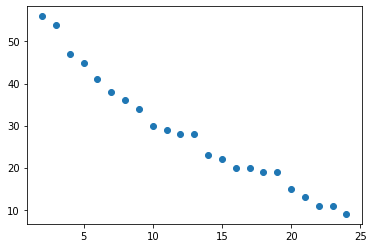

In [33]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
                acc, av_global, av_local = df_average(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d_for_accuracy.append([x,y,False, acc, av_global])
                else:
                    d_for_accuracy.append([x,y,True, acc, av_local])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_of_true_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df()

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return